In [1]:
#pip install transformers

In [1]:
import pandas as pd 
import numpy as np 
import re
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt
#import transformers
#import torch

#from transformers import GPT2Tokenizer, GPT2Model, GPT2Config, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/Datahack Hackathon

/content/drive/MyDrive/Datahack Hackathon


In [4]:
vid_data=pd.read_csv('dataset_datahack_videos.csv')
channel_data=pd.read_csv('dataset_datahack_channels.csv')

In [5]:
vid_data = vid_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [6]:
channel_data['Avg. Views per Video'] = channel_data['view_count'] / channel_data['video_count']

In [7]:
#channel_data['channel_age']

In [10]:
vid_data.head()
#python works for emoji chars 

,index,video_id,title,description,category_id,tags,duration,view_count,likes,comments,upload_time,channel_title,thumbnail,topic_categories,Comments
0,0,-gJ1a4qzO58,Adopted by the SMALLEST FAMILY in Minecraft! (...,Adopted by the SMALLEST FAMILY in Minecraft! (...,20,"['minecraft', 'yes smarty pie himlands', 'Adop...",PT18M59S,108078,3539,840,2023-03-10T09:32:59Z,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/-gJ1a4qzO58/de...,['https://en.wikipedia.org/wiki/Action-adventu...,['Favrt COLOUR BTAO and SUBSCRIBE krke Heart l...
1,2,XbIegQ5v334,I started playing chess when I was three years...,Aswath S (2214) is one of the brightest upcomi...,17,"['chessbaseindia', 'interviews', 'chesstrainin...",PT3M28S,2082,74,5,2023-03-29T06:30:09Z,ChessBase India,{'url': 'https://i.ytimg.com/vi/XbIegQ5v334/de...,"['https://en.wikipedia.org/wiki/Hobby', 'https...",['Congratulations Aswath Varun.. Way to go bro...
2,5,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",PT13M28S,91801,5100,220,2023-03-26T05:16:10Z,SeeKen,{'url': 'https://i.ytimg.com/vi/bTo4s27L1Uw/de...,['https://en.wikipedia.org/wiki/Society'],"[""So nice explaining, can't express in words"",..."
3,6,iEtjePI_sqc,Mere paas SABOOT nahi hai!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",PT12M50S,1059186,46367,1846,2023-03-04T07:45:08Z,Sambhavna Seth Entertainment,{'url': 'https://i.ytimg.com/vi/iEtjePI_sqc/de...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,['I recently delivered a baby boy. He is 10 da...
4,8,gSYT7WSfekk,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,20,"['minecraft', 'yessmartypie himlands', 'The BI...",PT16M7S,155964,6147,1163,2023-03-12T07:50:52Z,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/gSYT7WSfekk/de...,['https://en.wikipedia.org/wiki/Action-adventu...,['Pet btao and Subscribe krke Heart lelo \r IN...


In [7]:
vid_data.columns.values[9]='no_of_comments'
vid_data

,index,video_id,title,description,category_id,tags,duration,view_count,likes,no_of_comments,upload_time,channel_title,thumbnail,topic_categories,Comments
0,0,-gJ1a4qzO58,Adopted by the SMALLEST FAMILY in Minecraft! (...,Adopted by the SMALLEST FAMILY in Minecraft! (...,20,"['minecraft', 'yes smarty pie himlands', 'Adop...",PT18M59S,108078,3539,840,2023-03-10T09:32:59Z,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/-gJ1a4qzO58/de...,['https://en.wikipedia.org/wiki/Action-adventu...,['Favrt COLOUR BTAO and SUBSCRIBE krke Heart l...
1,2,XbIegQ5v334,I started playing chess when I was three years...,Aswath S (2214) is one of the brightest upcomi...,17,"['chessbaseindia', 'interviews', 'chesstrainin...",PT3M28S,2082,74,5,2023-03-29T06:30:09Z,ChessBase India,{'url': 'https://i.ytimg.com/vi/XbIegQ5v334/de...,"['https://en.wikipedia.org/wiki/Hobby', 'https...",['Congratulations Aswath Varun.. Way to go bro...
2,5,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",PT13M28S,91801,5100,220,2023-03-26T05:16:10Z,SeeKen,{'url': 'https://i.ytimg.com/vi/bTo4s27L1Uw/de...,['https://en.wikipedia.org/wiki/Society'],"[""So nice explaining, can't express in words"",..."
3,6,iEtjePI_sqc,Mere paas SABOOT nahi hai!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",PT12M50S,1059186,46367,1846,2023-03-04T07:45:08Z,Sambhavna Seth Entertainment,{'url': 'https://i.ytimg.com/vi/iEtjePI_sqc/de...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,['I recently delivered a baby boy. He is 10 da...
4,8,gSYT7WSfekk,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,20,"['minecraft', 'yessmartypie himlands', 'The BI...",PT16M7S,155964,6147,1163,2023-03-12T07:50:52Z,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/gSYT7WSfekk/de...,['https://en.wikipedia.org/wiki/Action-adventu...,['Pet btao and Subscribe krke Heart lelo \r IN...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,742,r6C1nf_iz3o,"""Tell me about Yourself"" ka SABSE SAHI Answer","Hello Everyone, My Name is Ishaan Arora.\nI'm ...",27,"['finladder ishaan arora', 'tedx ishaan arora'...",PT59S,2351,185,0,2023-02-21T12:57:44Z,Ishaan Arora,{'url': 'https://i.ytimg.com/vi/r6C1nf_iz3o/de...,['https://en.wikipedia.org/wiki/Knowledge'],"[""Hello Everyone, My Name is Ishaan Arora.I'm ..."
467,743,515fPTbB-2o,Is 2023 the BEST YEAR to START UP? | Antler In...,Get my new book ‘GET EPIC SHIT DONE’ here: htt...,27,"['warikoo', 'ankur warikoo', 'Ankur Warikoo mo...",PT32M10S,38969,1245,182,2023-03-16T14:30:01Z,warikoo,{'url': 'https://i.ytimg.com/vi/515fPTbB-2o/de...,"['https://en.wikipedia.org/wiki/Business', 'ht...",['Get my new book ‘GET EPIC SHIT DONE’ here: h...
468,745,rJd57wSoxs8,Top 4 Reasons To Learn Personal Finance | Wome...,✔️ Invest in Knowledge: https://social.rachana...,27,"['CA Rachana Ranade', 'stock market basics', '...",PT9M,34971,1451,80,2023-03-05T08:30:18Z,CA Rachana Phadke Ranade,{'url': 'https://i.ytimg.com/vi/rJd57wSoxs8/de...,['https://en.wikipedia.org/wiki/Society'],['I showed this video to my spouse. She is hap...
469,747,sVte67QEAvU,Mummy ka Vlog TRENDING pe le aao!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",PT13M58S,584614,40702,1493,2023-03-27T06:30:41Z,Sambhavna Seth Entertainment,{'url': 'https://i.ytimg.com/vi/sVte67QEAvU/de...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,['Mother-Daugher love is pure... both of you l...


In [8]:
vid_data.describe()

,index,category_id,view_count,likes,no_of_comments
count,471.000000,471.000000,4.710000e+02,4.710000e+02,471.000000
mean,368.403397,21.690021,4.160666e+05,2.816723e+04,1044.980892
std,217.156142,6.563397,1.468884e+06,9.570029e+04,4052.111855
min,0.000000,1.000000,3.000000e+00,0.000000e+00,0.000000
25%,181.500000,20.000000,3.014000e+03,1.555000e+02,15.500000
50%,369.000000,23.000000,5.448900e+04,2.726000e+03,135.000000
75%,547.500000,27.000000,3.012735e+05,2.142050e+04,829.000000
max,748.000000,27.000000,1.654122e+07,1.081179e+06,54074.000000


In [9]:
col_names_vid=channel_data.columns

In [ ]:
col_names_vid

In [ ]:
channel_data.head()

In [ ]:
channel_data.describe()

In [10]:
channel_data_cols=vid_data.columns

In [ ]:
channel_data_cols

In [11]:
import re

# Sample comment
comment = "I love this movie! 😍❤️"

# Remove emojis from comment
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
comment = emoji_pattern.sub(r'', comment)

print(comment)

I love this movie! ❤️


In [12]:
#use loc 
#df.loc[:,"col_names"]
description_col=channel_data.loc[:,"description"]
#now we need to check and clean each comment seperately 
description_col

0     Ahoy! Gamers What is Up it's your Boi Onkiify....
1     Sup Guys\n                 I'm just a Weirdo W...
2     Hello Gamer's 😍\n\nHello Family, \nMera Name H...
3     \nAGAR AAP LOG FREE FIRE LOVER❤️ HO TO MERA CH...
4     1000 subscribers - 31/12/2021\n10000 subscribe...
5     Hi guys I am Prabhat from Uttarakhand❤️\n🎬This...
6     So Hey Guys...!\nSUBHAM HORE Hare And Welcome ...
7     🔔🔔 bell all pe set karlo 🔔🔔plz\n❤️My name =Ani...
8     Actors Funny Motivational Video Creator, Short...
9     हँसते रहो हँसाते रहो बस हमारा यही एक प्रयास है...
10    Hey, This is Jentilal and welcome to my Youtub...
11    Official Channel Of AG! \nTwo Brother From ano...
12    Comedian Vikas thakur from shimla Himachal par...
13                                                  NaN
14    Watch awesome content created across categorie...
15    This channel is dedicated to providing quality...
16    This channel is all about Competitive Programm...
17    Gate Smashers is India's no 1 Free educati

In [13]:
import re
import numpy as np

# Sample text data
text = "👍 This is a 👌 test 🙌"

# Extract emoji combinations
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"  # dingbats
        u"\U000024C2-\U0001F251" 
        "]+", flags=re.UNICODE)
emoji_pattern

re.compile(r'[😀-🙏🌀-🗿🚀-\U0001f6ff\U0001f1e0-🇿✂-➰Ⓜ-🉑]+', re.UNICODE)

In [14]:
channel_data['description'] = channel_data['description'].astype(str)

# Print the result
print(channel_data)

    Unnamed: 0.1  Unnamed: 0                channel_id  \
0              0           0  UCn_l37ETRGxVsVqPAZM-y7w   
1              1           1  UCg3811K2k6ZW0T9wrUyq7UQ   
2              2           2  UCO1-i4iqe_Kg0B-nwt5W0Gg   
3              3           3  UC6AhmVhClcDx2RPsFFw_fAA   
4              4           4  UC5v-gTzCpaY257sxx-8P_-Q   
5              5           5  UCHOrSFKttbAKpcyjnBfVqkw   
6              6           6  UCQRSY8W2A1DST5qtm8NNhMA   
7              7           7  UC2IuURiiASwNigfQJtXiRdQ   
8              8           8  UC8k6b-QBPW79SOvO4C9hBOQ   
9              9           9  UCo-61NMiPlPP6er3I9AcDvw   
10            10          10  UCmVATZGddUN9Xj4NLoSzYcw   
11            11          11  UCNzn3WhDLAfulMSzFzqhqTw   
12            12          12  UCLHAyQ3M3Y-GWF3Pov1mFfw   
13            13          13  UCY5pmgVzfxBXHBjnRnP-alQ   
14            14          14  UC1_-cyLlwnmTAesbMgruDpQ   
15            15          15  UC9cpGw2hVv-6G-76HO22jQg   
16            

In [15]:
#import pandas as pd
#import re




emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"  # dingbats
        u"\U000024C2-\U0001F251" 
        "]+", flags=re.UNICODE)

# Extract emojis from column 'col'
channel_data['emojis'] = channel_data['description'].apply(lambda x: emoji_pattern.findall(x))

# Remove emojis from column 'col'
channel_data['clean_col'] = channel_data['description'].apply(lambda x: emoji_pattern.sub(r'', x))

# Print the result
print(channel_data)


    Unnamed: 0.1  Unnamed: 0                channel_id  \
0              0           0  UCn_l37ETRGxVsVqPAZM-y7w   
1              1           1  UCg3811K2k6ZW0T9wrUyq7UQ   
2              2           2  UCO1-i4iqe_Kg0B-nwt5W0Gg   
3              3           3  UC6AhmVhClcDx2RPsFFw_fAA   
4              4           4  UC5v-gTzCpaY257sxx-8P_-Q   
5              5           5  UCHOrSFKttbAKpcyjnBfVqkw   
6              6           6  UCQRSY8W2A1DST5qtm8NNhMA   
7              7           7  UC2IuURiiASwNigfQJtXiRdQ   
8              8           8  UC8k6b-QBPW79SOvO4C9hBOQ   
9              9           9  UCo-61NMiPlPP6er3I9AcDvw   
10            10          10  UCmVATZGddUN9Xj4NLoSzYcw   
11            11          11  UCNzn3WhDLAfulMSzFzqhqTw   
12            12          12  UCLHAyQ3M3Y-GWF3Pov1mFfw   
13            13          13  UCY5pmgVzfxBXHBjnRnP-alQ   
14            14          14  UC1_-cyLlwnmTAesbMgruDpQ   
15            15          15  UC9cpGw2hVv-6G-76HO22jQg   
16            

In [16]:
channel_data['description']

0     Ahoy! Gamers What is Up it's your Boi Onkiify....
1     Sup Guys\n                 I'm just a Weirdo W...
2     Hello Gamer's 😍\n\nHello Family, \nMera Name H...
3     \nAGAR AAP LOG FREE FIRE LOVER❤️ HO TO MERA CH...
4     1000 subscribers - 31/12/2021\n10000 subscribe...
5     Hi guys I am Prabhat from Uttarakhand❤️\n🎬This...
6     So Hey Guys...!\nSUBHAM HORE Hare And Welcome ...
7     🔔🔔 bell all pe set karlo 🔔🔔plz\n❤️My name =Ani...
8     Actors Funny Motivational Video Creator, Short...
9     हँसते रहो हँसाते रहो बस हमारा यही एक प्रयास है...
10    Hey, This is Jentilal and welcome to my Youtub...
11    Official Channel Of AG! \nTwo Brother From ano...
12    Comedian Vikas thakur from shimla Himachal par...
13                                                  nan
14    Watch awesome content created across categorie...
15    This channel is dedicated to providing quality...
16    This channel is all about Competitive Programm...
17    Gate Smashers is India's no 1 Free educati

In [ ]:
#problem 2 
# aim to create an upload schedule 
#

In [17]:
vid_data['upload_time']

0      2023-03-10T09:32:59Z
1      2023-03-29T06:30:09Z
2      2023-03-26T05:16:10Z
3      2023-03-04T07:45:08Z
4      2023-03-12T07:50:52Z
               ...         
466    2023-02-21T12:57:44Z
467    2023-03-16T14:30:01Z
468    2023-03-05T08:30:18Z
469    2023-03-27T06:30:41Z
470    2023-03-11T20:02:43Z
Name: upload_time, Length: 471, dtype: object

#conversion of date time 


In [18]:
from datetime import datetime, timedelta



# define a function to convert duration string to datetime object
def parse_duration(duration_str):
    duration_str = duration_str[2:]  # remove 'PT' prefix
    hours, minutes, seconds = 0, 0, 0
    if 'H' in duration_str:
        hours_str, duration_str = duration_str.split('H')
        hours = int(hours_str)
    if 'M' in duration_str:
        minutes_str, duration_str = duration_str.split('M')
        minutes = int(minutes_str)
    if 'S' in duration_str:
        seconds_str = duration_str.replace('S', '')
        seconds = int(seconds_str)
    return timedelta(hours=hours, minutes=minutes, seconds=seconds)

# apply the function to the 'duration' column
vid_data['duration'] = vid_data['duration'].apply(parse_duration)

# display the updated DataFrame
print(vid_data)

     index     video_id                                              title  \
0        0  -gJ1a4qzO58  Adopted by the SMALLEST FAMILY in Minecraft! (...   
1        2  XbIegQ5v334  I started playing chess when I was three years...   
2        5  bTo4s27L1Uw  #1 How @BBKiVines become 1 of India’s RICHEST ...   
3        6  iEtjePI_sqc                         Mere paas SABOOT nahi hai!   
4        8  gSYT7WSfekk  The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...   
..     ...          ...                                                ...   
466    742  r6C1nf_iz3o      "Tell me about Yourself" ka SABSE SAHI Answer   
467    743  515fPTbB-2o  Is 2023 the BEST YEAR to START UP? | Antler In...   
468    745  rJd57wSoxs8  Top 4 Reasons To Learn Personal Finance | Wome...   
469    747  sVte67QEAvU                  Mummy ka Vlog TRENDING pe le aao!   
470    748  yV49JQ7d6-4                   Dominate 3.0 with OnePlus 11R 5G   

                                           description  categor

In [19]:




vid_data['upload_time'] = pd.to_datetime(vid_data['upload_time'], format='%Y-%m-%dT%H:%M:%SZ')


vid_data['year'] = vid_data['upload_time'].dt.year
vid_data['month'] = vid_data['upload_time'].dt.month
vid_data['day'] = vid_data['upload_time'].dt.day
print(vid_data)

     index     video_id                                              title  \
0        0  -gJ1a4qzO58  Adopted by the SMALLEST FAMILY in Minecraft! (...   
1        2  XbIegQ5v334  I started playing chess when I was three years...   
2        5  bTo4s27L1Uw  #1 How @BBKiVines become 1 of India’s RICHEST ...   
3        6  iEtjePI_sqc                         Mere paas SABOOT nahi hai!   
4        8  gSYT7WSfekk  The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...   
..     ...          ...                                                ...   
466    742  r6C1nf_iz3o      "Tell me about Yourself" ka SABSE SAHI Answer   
467    743  515fPTbB-2o  Is 2023 the BEST YEAR to START UP? | Antler In...   
468    745  rJd57wSoxs8  Top 4 Reasons To Learn Personal Finance | Wome...   
469    747  sVte67QEAvU                  Mummy ka Vlog TRENDING pe le aao!   
470    748  yV49JQ7d6-4                   Dominate 3.0 with OnePlus 11R 5G   

                                           description  categor

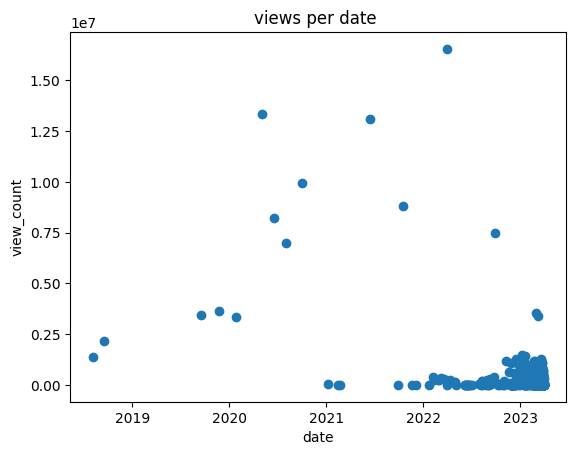

In [20]:

y = vid_data['view_count']
x = vid_data['upload_time']

# create line plot
plt.scatter(x, y)

# add labels and title
plt.xlabel('date')
plt.ylabel('view_count')
plt.title('views per date ')

# show plot
plt.show()







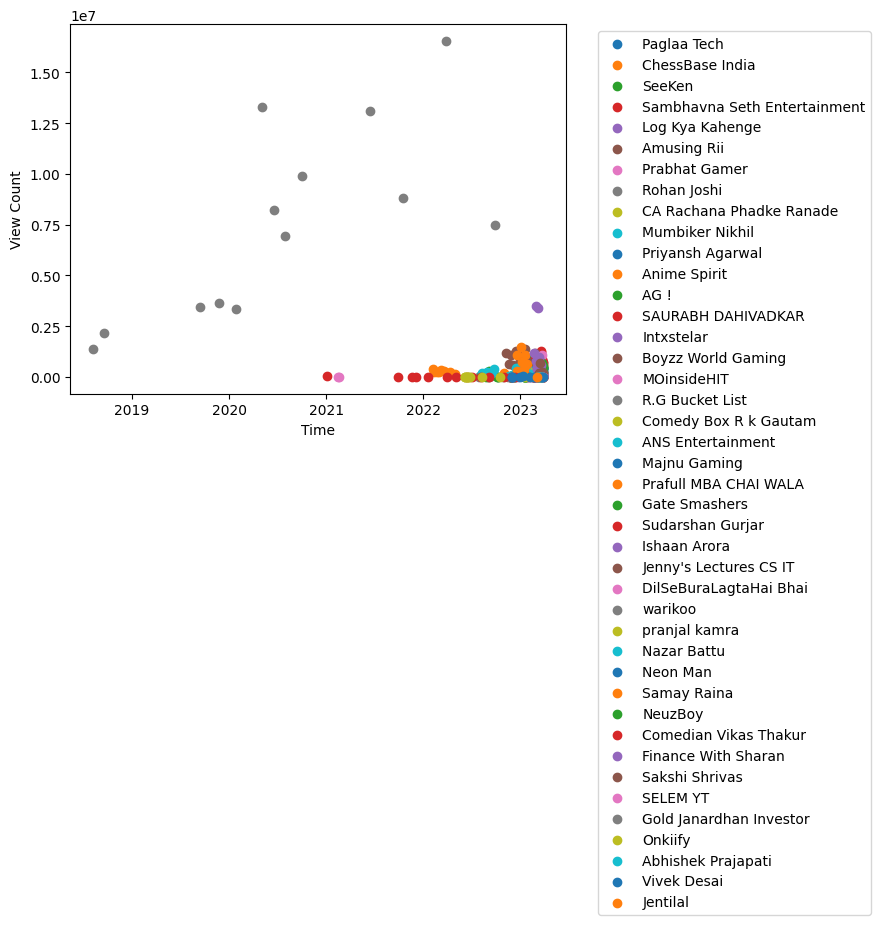

In [21]:
import matplotlib.pyplot as plt

# Get unique user profiles
user_profiles = vid_data['channel_title'].unique()

# Plot view count vs time for each user profile
for profile in user_profiles:
    subset = vid_data[vid_data['channel_title'] == profile]
    plt.scatter(subset['upload_time'], subset['view_count'], label=profile)

# Add labels and legend
subset = vid_data[vid_data['channel_title'] == user_profiles[1]]
#plt.plot(subset['upload_time'], subset['view_count'], label=user_profiles[1])
plt.xlabel('Time')
plt.ylabel('View Count')
plt.legend(bbox_to_anchor=(1.05, 1.0))

# Show plot
plt.show()

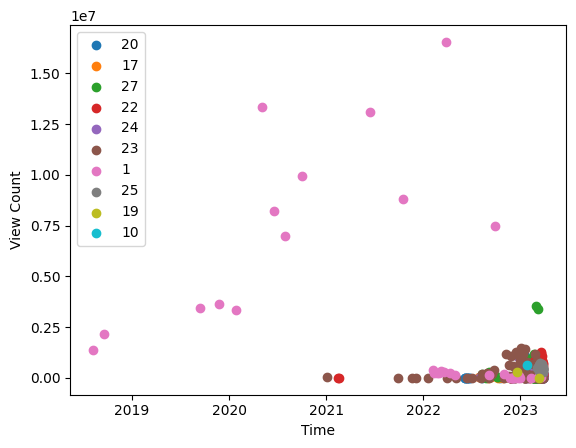

In [22]:
# Get unique user profiles
category_ = vid_data['category_id'].unique()

# Plot view count vs time for each user profile
for c in category_:
    subset = vid_data[vid_data['category_id'] == c]
    plt.scatter(subset['upload_time'], subset['view_count'], label=c)

# Add labels and legend
subset = vid_data[vid_data['category_id'] == user_profiles[1]]
#plt.plot(subset['upload_time'], subset['view_count'], label=user_profiles[1])
plt.xlabel('Time')
plt.ylabel('View Count')
plt.legend()

# Show plot
plt.show()

In [ ]:
vid_data.columns

In [ ]:
vid_data['upload_time']

In [ ]:
vid_data

In [ ]:
vid_data.Comments

In [ ]:
vid_data.columns

In [95]:
vid_data['Engagement_Ratio'] = (vid_data['likes'] + vid_data['no_of_comments']) / vid_data['view_count']
vid_data

,index,video_id,title,description,category_id,tags,duration,view_count,likes,no_of_comments,...,channel_title,thumbnail,topic_categories,Comments,year,month,day,Polarity,measure,Engagement_Ratio
0,0,-gJ1a4qzO58,Adopted by the SMALLEST FAMILY in Minecraft! (...,Adopted by the SMALLEST FAMILY in Minecraft! (...,20,"['minecraft', 'yes smarty pie himlands', 'Adop...",0 days 00:18:59,108078,3539,840,...,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/-gJ1a4qzO58/de...,['https://en.wikipedia.org/wiki/Action-adventu...,['Favrt COLOUR BTAO and SUBSCRIBE krke Heart l...,2023,3,10,0.167875,108078,0.040517
1,2,XbIegQ5v334,I started playing chess when I was three years...,Aswath S (2214) is one of the brightest upcomi...,17,"['chessbaseindia', 'interviews', 'chesstrainin...",0 days 00:03:28,2082,74,5,...,ChessBase India,{'url': 'https://i.ytimg.com/vi/XbIegQ5v334/de...,"['https://en.wikipedia.org/wiki/Hobby', 'https...",['Congratulations Aswath Varun.. Way to go bro...,2023,3,29,0.073939,2082,0.037944
2,5,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",0 days 00:13:28,91801,5100,220,...,SeeKen,{'url': 'https://i.ytimg.com/vi/bTo4s27L1Uw/de...,['https://en.wikipedia.org/wiki/Society'],"[""So nice explaining, can't express in words"",...",2023,3,26,0.363439,91801,0.057951
3,6,iEtjePI_sqc,Mere paas SABOOT nahi hai!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",0 days 00:12:50,1059186,46367,1846,...,Sambhavna Seth Entertainment,{'url': 'https://i.ytimg.com/vi/iEtjePI_sqc/de...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,['I recently delivered a baby boy. He is 10 da...,2023,3,4,0.299511,1059186,0.045519
4,8,gSYT7WSfekk,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,20,"['minecraft', 'yessmartypie himlands', 'The BI...",0 days 00:16:07,155964,6147,1163,...,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/gSYT7WSfekk/de...,['https://en.wikipedia.org/wiki/Action-adventu...,['Pet btao and Subscribe krke Heart lelo \r IN...,2023,3,12,0.402919,155964,0.046870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,742,r6C1nf_iz3o,"""Tell me about Yourself"" ka SABSE SAHI Answer","Hello Everyone, My Name is Ishaan Arora.\nI'm ...",27,"['finladder ishaan arora', 'tedx ishaan arora'...",0 days 00:00:59,2351,185,0,...,Ishaan Arora,{'url': 'https://i.ytimg.com/vi/r6C1nf_iz3o/de...,['https://en.wikipedia.org/wiki/Knowledge'],"[""Hello Everyone, My Name is Ishaan Arora.I'm ...",2023,2,21,0.250000,2351,0.078690
467,743,515fPTbB-2o,Is 2023 the BEST YEAR to START UP? | Antler In...,Get my new book ‘GET EPIC SHIT DONE’ here: htt...,27,"['warikoo', 'ankur warikoo', 'Ankur Warikoo mo...",0 days 00:32:10,38969,1245,182,...,warikoo,{'url': 'https://i.ytimg.com/vi/515fPTbB-2o/de...,"['https://en.wikipedia.org/wiki/Business', 'ht...",['Get my new book ‘GET EPIC SHIT DONE’ here: h...,2023,3,16,0.200109,38969,0.036619
468,745,rJd57wSoxs8,Top 4 Reasons To Learn Personal Finance | Wome...,✔️ Invest in Knowledge: https://social.rachana...,27,"['CA Rachana Ranade', 'stock market basics', '...",0 days 00:09:00,34971,1451,80,...,CA Rachana Phadke Ranade,{'url': 'https://i.ytimg.com/vi/rJd57wSoxs8/de...,['https://en.wikipedia.org/wiki/Society'],['I showed this video to my spouse. She is hap...,2023,3,5,0.253846,34971,0.043779
469,747,sVte67QEAvU,Mummy ka Vlog TRENDING pe le aao!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",0 days 00:13:58,584614,40702,1493,...,Sambhavna Seth Entertainment,{'url': 'https://i.ytimg.com/vi/sVte67QEAvU/de...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,['Mother-Daugher love is pure... both of you l...,2023,3,27,0.263260,584614,0.072176


Polarity

In [24]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from textblob import TextBlob

In [26]:
Polarity=[] # list which will contain the polarity of the comments

for i in vid_data['Comments']:
    Polarity.append(TextBlob(i).sentiment.polarity)

In [28]:
vid_data["Polarity"] = Polarity
vid_data.head()

,index,video_id,title,description,category_id,tags,duration,view_count,likes,no_of_comments,upload_time,channel_title,thumbnail,topic_categories,Comments,year,month,day,Polarity
0,0,-gJ1a4qzO58,Adopted by the SMALLEST FAMILY in Minecraft! (...,Adopted by the SMALLEST FAMILY in Minecraft! (...,20,"['minecraft', 'yes smarty pie himlands', 'Adop...",0 days 00:18:59,108078,3539,840,2023-03-10 09:32:59,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/-gJ1a4qzO58/de...,['https://en.wikipedia.org/wiki/Action-adventu...,['Favrt COLOUR BTAO and SUBSCRIBE krke Heart l...,2023,3,10,0.167875
1,2,XbIegQ5v334,I started playing chess when I was three years...,Aswath S (2214) is one of the brightest upcomi...,17,"['chessbaseindia', 'interviews', 'chesstrainin...",0 days 00:03:28,2082,74,5,2023-03-29 06:30:09,ChessBase India,{'url': 'https://i.ytimg.com/vi/XbIegQ5v334/de...,"['https://en.wikipedia.org/wiki/Hobby', 'https...",['Congratulations Aswath Varun.. Way to go bro...,2023,3,29,0.073939
2,5,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",0 days 00:13:28,91801,5100,220,2023-03-26 05:16:10,SeeKen,{'url': 'https://i.ytimg.com/vi/bTo4s27L1Uw/de...,['https://en.wikipedia.org/wiki/Society'],"[""So nice explaining, can't express in words"",...",2023,3,26,0.363439
3,6,iEtjePI_sqc,Mere paas SABOOT nahi hai!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",0 days 00:12:50,1059186,46367,1846,2023-03-04 07:45:08,Sambhavna Seth Entertainment,{'url': 'https://i.ytimg.com/vi/iEtjePI_sqc/de...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,['I recently delivered a baby boy. He is 10 da...,2023,3,4,0.299511
4,8,gSYT7WSfekk,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,20,"['minecraft', 'yessmartypie himlands', 'The BI...",0 days 00:16:07,155964,6147,1163,2023-03-12 07:50:52,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/gSYT7WSfekk/de...,['https://en.wikipedia.org/wiki/Action-adventu...,['Pet btao and Subscribe krke Heart lelo \r IN...,2023,3,12,0.402919


In [29]:
positive_comments = vid_data[vid_data["Polarity"] >= 0]
positive_comments.head()

,index,video_id,title,description,category_id,tags,duration,view_count,likes,no_of_comments,upload_time,channel_title,thumbnail,topic_categories,Comments,year,month,day,Polarity
0,0,-gJ1a4qzO58,Adopted by the SMALLEST FAMILY in Minecraft! (...,Adopted by the SMALLEST FAMILY in Minecraft! (...,20,"['minecraft', 'yes smarty pie himlands', 'Adop...",0 days 00:18:59,108078,3539,840,2023-03-10 09:32:59,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/-gJ1a4qzO58/de...,['https://en.wikipedia.org/wiki/Action-adventu...,['Favrt COLOUR BTAO and SUBSCRIBE krke Heart l...,2023,3,10,0.167875
1,2,XbIegQ5v334,I started playing chess when I was three years...,Aswath S (2214) is one of the brightest upcomi...,17,"['chessbaseindia', 'interviews', 'chesstrainin...",0 days 00:03:28,2082,74,5,2023-03-29 06:30:09,ChessBase India,{'url': 'https://i.ytimg.com/vi/XbIegQ5v334/de...,"['https://en.wikipedia.org/wiki/Hobby', 'https...",['Congratulations Aswath Varun.. Way to go bro...,2023,3,29,0.073939
2,5,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",0 days 00:13:28,91801,5100,220,2023-03-26 05:16:10,SeeKen,{'url': 'https://i.ytimg.com/vi/bTo4s27L1Uw/de...,['https://en.wikipedia.org/wiki/Society'],"[""So nice explaining, can't express in words"",...",2023,3,26,0.363439
3,6,iEtjePI_sqc,Mere paas SABOOT nahi hai!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",0 days 00:12:50,1059186,46367,1846,2023-03-04 07:45:08,Sambhavna Seth Entertainment,{'url': 'https://i.ytimg.com/vi/iEtjePI_sqc/de...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,['I recently delivered a baby boy. He is 10 da...,2023,3,4,0.299511
4,8,gSYT7WSfekk,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,20,"['minecraft', 'yessmartypie himlands', 'The BI...",0 days 00:16:07,155964,6147,1163,2023-03-12 07:50:52,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/gSYT7WSfekk/de...,['https://en.wikipedia.org/wiki/Action-adventu...,['Pet btao and Subscribe krke Heart lelo \r IN...,2023,3,12,0.402919


In [30]:
from wordcloud import WordCloud,STOPWORDS #stopwords is used to remove he/she/it etc words

In [31]:
total_positive= (" ".join(positive_comments["Comments"]))
len(total_positive)

2297941

(-0.5, 999.5, 499.5, -0.5)

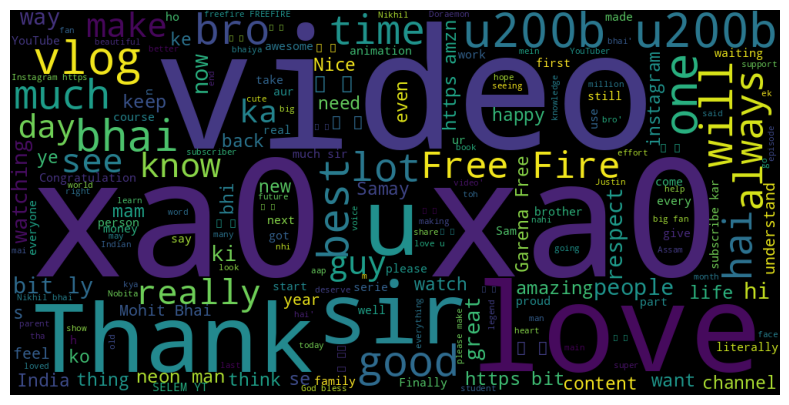

In [32]:
positive_wordcloud = WordCloud(width = 1000, height = 500, stopwords = set(STOPWORDS)).generate(total_positive) #set will remove all the repetition
plt.figure(figsize = (15,5))
plt.imshow(positive_wordcloud)
plt.axis("off")

In [33]:
negative_comments = vid_data[vid_data["Polarity"]<=-0.0001]
negative_comments.head()

,index,video_id,title,description,category_id,tags,duration,view_count,likes,no_of_comments,upload_time,channel_title,thumbnail,topic_categories,Comments,year,month,day,Polarity
28,40,ZEC52rUCFtc,"Kaha Gaya Kalahari😱-para_SAMSUNG,A3,A5,A6,A7,J...","Kaha Gaya Kalahari😱-para_SAMSUNG,A3,A5,A6,A7,J...",20,"['free fire', 'free fire max', 'shorts', 'vira...",0 days 00:00:47,346057,79650,921,2023-03-24 07:30:49,Prabhat Gamer,{'url': 'https://i.ytimg.com/vi/ZEC52rUCFtc/de...,"['https://en.wikipedia.org/wiki/Action_game', ...","['Op', 'Love from jasveer gaming', 'Nice ', 'o...",2023,3,24,-0.044679
93,144,LgaQUy5qlFI,WHY VALUE FOR PAPER MONEY,#money \n#currency \n#transaction \n#digitalcu...,27,"['Why we are using paper currency', 'History o...",0 days 00:01:00,503,60,2,2023-03-19 08:10:35,Gold Janardhan Investor,{'url': 'https://i.ytimg.com/vi/LgaQUy5qlFI/de...,['https://en.wikipedia.org/wiki/Society'],['Bro English subtitles haaku atleastAavaga no...,2023,3,19,-0.010000
105,162,jopIZ9-jvEQ,COMPLEX INTEGRATION | S-2 | LINE INTEGRAL | CO...,** The integration of a function of a complex ...,27,"['COMPLEX INETRGATION', 'complex integration',...",0 days 00:18:39,2234,72,16,2023-03-08 15:30:09,SAURABH DAHIVADKAR,{'url': 'https://i.ytimg.com/vi/jopIZ9-jvEQ/de...,['https://en.wikipedia.org/wiki/Knowledge'],"['Is there a daily live sessions ?', 'Sir N...",2023,3,8,-0.006543
160,243,dkPbUnV0upM,TRICKING Abhishek Upmanyu #shorts,NaN,23,"['Abhishek Upmanyu', 'Comedy', 'Abhishek Upman...",0 days 00:00:55,16422,1025,10,2023-02-21 07:06:47,Vivek Desai,{'url': 'https://i.ytimg.com/vi/dkPbUnV0upM/de...,['https://en.wikipedia.org/wiki/Entertainment'...,['Shoot bhale kitne bhi mahine pehle hua ho sh...,2023,2,21,-0.025000
210,330,o63nmmheJtI,"Beat Raistar Speed😱-para_SAMSUNG,A3,A5,A6,A7,J...","Beat Raistar Speed😱-para_SAMSUNG,A3,A5,A6,A7,J...",20,"['free fire', 'free fire max', 'shorts', 'vira...",0 days 00:01:00,85262,21435,253,2023-03-29 14:30:38,Prabhat Gamer,{'url': 'https://i.ytimg.com/vi/o63nmmheJtI/de...,['https://en.wikipedia.org/wiki/Video_game_cul...,"['To aap khud fast kyon nahi ho jaate bro ', '...",2023,3,29,-0.054849


In [34]:
total_negative= (" ".join(negative_comments["Comments"]))
len(total_negative)

74828

(-0.5, 999.5, 499.5, -0.5)

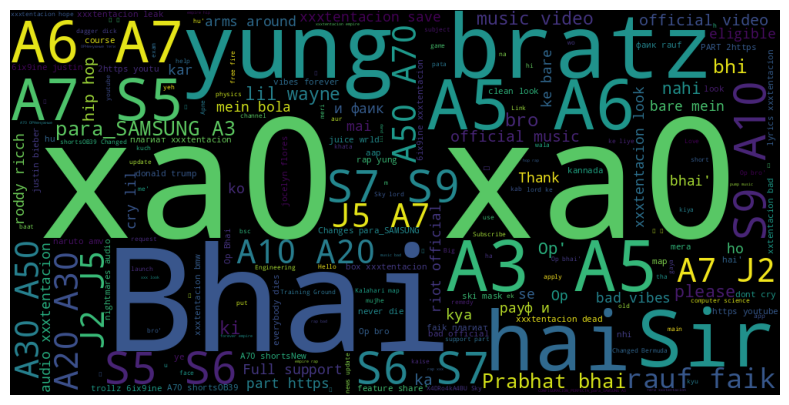

In [35]:
negative_wordcloud = WordCloud(width = 1000, height = 500, stopwords = set(STOPWORDS)).generate(total_negative) #set will remove all the repetition
plt.figure(figsize = (15,5))
plt.imshow(negative_wordcloud)
plt.axis("off")

In [36]:
Total_tags = ("".join(vid_data["tags"]))
vid_data["tags"][0]

"['minecraft', 'yes smarty pie himlands', 'Adopted by the SMALLEST FAMILY in Minecraft! (Hindi)', 'Adopted by the SMALLEST FAMILY', 'SMALLEST FAMILY', 'Paglaa Tech', 'Paglaa Tech Minecraft', 'minecraft video', 'himlands', 'yes smarty pie', 'Minecraft hindi', 'minecraft hardcore', 'small family', 'small family in minecraft', 'Minecraft in hindi', 'Minecraft hindi video', 'smallest family', 'ayush more', 'minecraft funny', 'mcpe', 'minecraft gameplay', 'minecraft survival', 'Paglaa became small', 'I became small in minecraft']"

In [37]:
Tags = re.sub("[^a-zA-Z]"," ", Total_tags)
Tags

'  minecraft    yes smarty pie himlands    Adopted by the SMALLEST FAMILY in Minecraft   Hindi     Adopted by the SMALLEST FAMILY    SMALLEST FAMILY    Paglaa Tech    Paglaa Tech Minecraft    minecraft video    himlands    yes smarty pie    Minecraft hindi    minecraft hardcore    small family    small family in minecraft    Minecraft in hindi    Minecraft hindi video    smallest family    ayush more    minecraft funny    mcpe    minecraft gameplay    minecraft survival    Paglaa became small    I became small in minecraft    chessbaseindia    interviews    chesstraining    improvechess    chess    how to play chess    seeken    zeeshan shaikh    booming digital stars    manish pandey beerbiceps    book sues    animated book summaries    booming digital stars book    booming digital stars book review    digital stars    booming digital stars book summary    booming digital stars manish pandey    booming digital star manish pandey    booming digital stars pdf    digital booming stars   

In [38]:
Tags = re.sub(" +"," ",Tags)
Tags

' minecraft yes smarty pie himlands Adopted by the SMALLEST FAMILY in Minecraft Hindi Adopted by the SMALLEST FAMILY SMALLEST FAMILY Paglaa Tech Paglaa Tech Minecraft minecraft video himlands yes smarty pie Minecraft hindi minecraft hardcore small family small family in minecraft Minecraft in hindi Minecraft hindi video smallest family ayush more minecraft funny mcpe minecraft gameplay minecraft survival Paglaa became small I became small in minecraft chessbaseindia interviews chesstraining improvechess chess how to play chess seeken zeeshan shaikh booming digital stars manish pandey beerbiceps book sues animated book summaries booming digital stars book booming digital stars book review digital stars booming digital stars book summary booming digital stars manish pandey booming digital star manish pandey booming digital stars pdf digital booming stars booming digital stars book pdf manish pandey booming digital stars booming digital stars book pdf download booming digital star sambhav

(-0.5, 999.5, 499.5, -0.5)

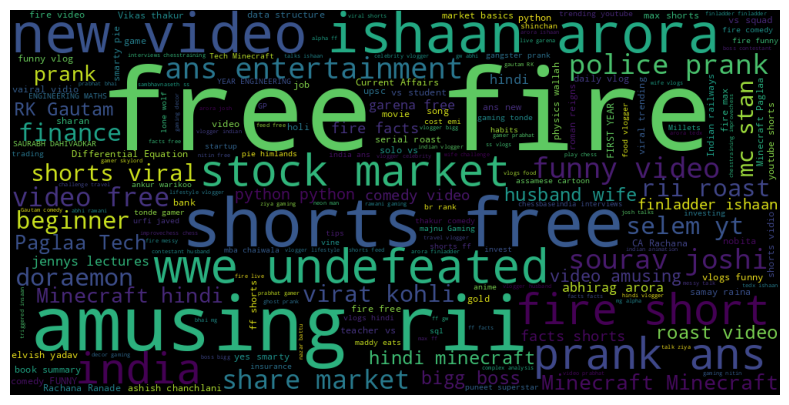

In [39]:
tags_wordcloud = WordCloud(width = 1000, height = 500, stopwords = set(STOPWORDS)).generate(Tags)
plt.figure(figsize = (15,5))
plt.imshow(tags_wordcloud)
plt.axis("off")

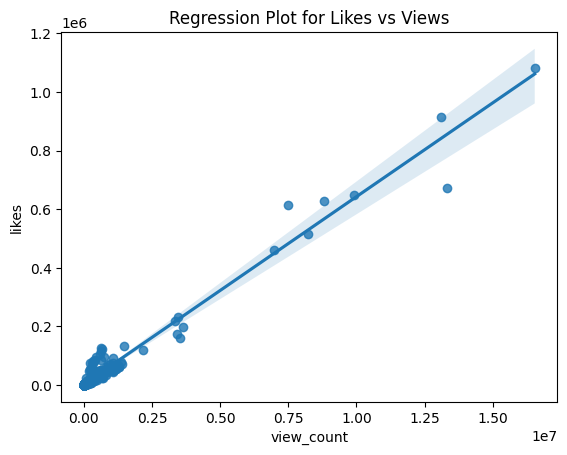

In [40]:
sns.regplot(data = vid_data, x= "view_count", y = "likes")
plt.title("Regression Plot for Likes vs Views")
plt.show()

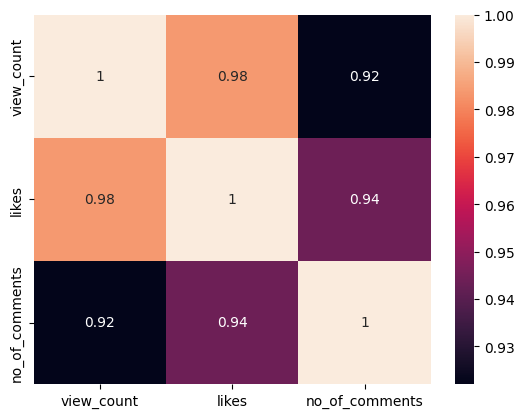

In [41]:
correlation = vid_data[["view_count","likes","no_of_comments"]]
sns.heatmap(correlation.corr(),annot = True) 
plt.show()

In [42]:
df_27=vid_data[vid_data.category_id==27]
df_27

,index,video_id,title,description,category_id,tags,duration,view_count,likes,no_of_comments,upload_time,channel_title,thumbnail,topic_categories,Comments,year,month,day,Polarity
2,5,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",0 days 00:13:28,91801,5100,220,2023-03-26 05:16:10,SeeKen,{'url': 'https://i.ytimg.com/vi/bTo4s27L1Uw/de...,['https://en.wikipedia.org/wiki/Society'],"[""So nice explaining, can't express in words"",...",2023,3,26,0.363439
7,11,fVToMH6onOs,5 LIFE Lessons Men Learn TOO LATE In Life (MUS...,Timestamps:\n00:00 - Robot Man And Future \n01...,27,"['masculine energy', 'how to be a high value m...",0 days 00:13:24,652716,33761,566,2023-01-01 05:27:07,SeeKen,{'url': 'https://i.ytimg.com/vi/fVToMH6onOs/de...,['https://en.wikipedia.org/wiki/Knowledge'],['Mistakes-:1- good relationship is more impor...,2023,1,1,0.338376
11,19,SmLUuNQK9js,What Next for Yes Bank? | CA Rachana Ranade | ...,"Description:- In March 2020, a consortium of i...",27,"['CA Rachana Ranade', 'Rachana Ranade', 'Finfl...",0 days 00:00:48,77773,2587,61,2023-03-11 12:30:21,CA Rachana Phadke Ranade,{'url': 'https://i.ytimg.com/vi/SmLUuNQK9js/de...,['https://en.wikipedia.org/wiki/Knowledge'],"[""there was a recent 10 - 12 % correction (bef...",2023,3,11,0.086839
14,22,CSf2YBaIl0s,Get the most out of every Coding Problem with ...,When it comes to getting better at problem sol...,27,"['coding', 'competitiveprogramming', 'dsa', 'p...",0 days 00:11:27,5013,389,36,2023-03-16 11:27:34,Priyansh Agarwal,{'url': 'https://i.ytimg.com/vi/CSf2YBaIl0s/de...,['https://en.wikipedia.org/wiki/Knowledge'],"[""Tip 1: Try and prove ur solution, do not rel...",2023,3,16,0.176688
17,26,g8gy21DRK34,COMPLEX INTEGRATION | S-4 | LINE INTEGRAL | CO...,** The integration of a function of a complex ...,27,"['COMPLEX INETRGATION', 'complex integration',...",0 days 00:24:04,779,33,3,2023-03-19 15:00:11,SAURABH DAHIVADKAR,{'url': 'https://i.ytimg.com/vi/g8gy21DRK34/de...,['https://en.wikipedia.org/wiki/Knowledge'],"['Sir, btech first year ki physics mein ek cha...",2023,3,19,0.034615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,721,_5_LCGRRaoM,FINANCE Job Interviews ke liye FREE Resource! ...,"Hello Everyone, My Name is Ishaan Arora.\nI'm ...",27,"['finladder ishaan arora', 'tedx ishaan arora'...",0 days 00:00:49,1710,111,5,2023-03-28 12:00:24,Ishaan Arora,{'url': 'https://i.ytimg.com/vi/_5_LCGRRaoM/de...,['https://en.wikipedia.org/wiki/Knowledge'],['Interview Questions: https://docs.google.com...,2023,3,28,0.250000
465,740,ERcubYkMifY,6 Highest Paying Finance Jobs in India!,"In this video, Ishaan Arora talks about the hi...",27,"['finladder ishaan arora', 'tedx ishaan arora'...",0 days 00:06:43,5226,291,61,2023-02-23 13:30:11,Ishaan Arora,{'url': 'https://i.ytimg.com/vi/ERcubYkMifY/de...,['https://en.wikipedia.org/wiki/Society'],['Job se pehle paise kamaane hain? Watch thish...,2023,2,23,0.223435
466,742,r6C1nf_iz3o,"""Tell me about Yourself"" ka SABSE SAHI Answer","Hello Everyone, My Name is Ishaan Arora.\nI'm ...",27,"['finladder ishaan arora', 'tedx ishaan arora'...",0 days 00:00:59,2351,185,0,2023-02-21 12:57:44,Ishaan Arora,{'url': 'https://i.ytimg.com/vi/r6C1nf_iz3o/de...,['https://en.wikipedia.org/wiki/Knowledge'],"[""Hello Everyone, My Name is Ishaan Arora.I'm ...",2023,2,21,0.250000
467,743,515fPTbB-2o,Is 2023 the BEST YEAR to START UP? | Antler In...,Get my new book ‘GET EPIC SHIT DONE’ here: htt...,27,"['warikoo', 'ankur warikoo', 'Ankur Warikoo mo...",0 days 00:32:10,38969,1245,182,2023-03-16 14:30:01,warikoo,{'url': 'https://i.ytimg.com/vi/515fPTbB-2o/de...,"['https://en.wikipedia.org/wiki/Business', 'ht...",['Get my new book ‘GET EPIC SHIT DONE’ here: h...,2023,3,16,0.200109


In [43]:
Total_tags_df_27 = ("".join(df_27["tags"]))
#df_27["tags"][0]

In [44]:
Tags_df_27 = re.sub("[^a-zA-Z]"," ", Total_tags_df_27)
Tags_df_27

'  seeken    zeeshan shaikh    booming digital stars    manish pandey beerbiceps    book sues    animated book summaries    booming digital stars book    booming digital stars book review    digital stars    booming digital stars book summary    booming digital stars manish pandey    booming digital star manish pandey    booming digital stars pdf    digital booming stars    booming digital stars book pdf    manish pandey booming digital stars    booming digital stars book pdf download    booming digital star    masculine energy    how to be a high value man    self improvement    mens self improvement    modern dating    high value man motivation    high value man mindset    seeken    book summary    Zeeshan Shaikh    jordan peterson       rules for       rules for life summary    beyond order jordan peterson    self help    life lessons    self development    high value men    how to talk to girls    over stimulation    far from weak    jordan peterson motivation    jordan peterson de

In [45]:
Tags_df_27 = re.sub(" +"," ",Tags)
Tags_df_27

' minecraft yes smarty pie himlands Adopted by the SMALLEST FAMILY in Minecraft Hindi Adopted by the SMALLEST FAMILY SMALLEST FAMILY Paglaa Tech Paglaa Tech Minecraft minecraft video himlands yes smarty pie Minecraft hindi minecraft hardcore small family small family in minecraft Minecraft in hindi Minecraft hindi video smallest family ayush more minecraft funny mcpe minecraft gameplay minecraft survival Paglaa became small I became small in minecraft chessbaseindia interviews chesstraining improvechess chess how to play chess seeken zeeshan shaikh booming digital stars manish pandey beerbiceps book sues animated book summaries booming digital stars book booming digital stars book review digital stars booming digital stars book summary booming digital stars manish pandey booming digital star manish pandey booming digital stars pdf digital booming stars booming digital stars book pdf manish pandey booming digital stars booming digital stars book pdf download booming digital star sambhav

(-0.5, 999.5, 499.5, -0.5)

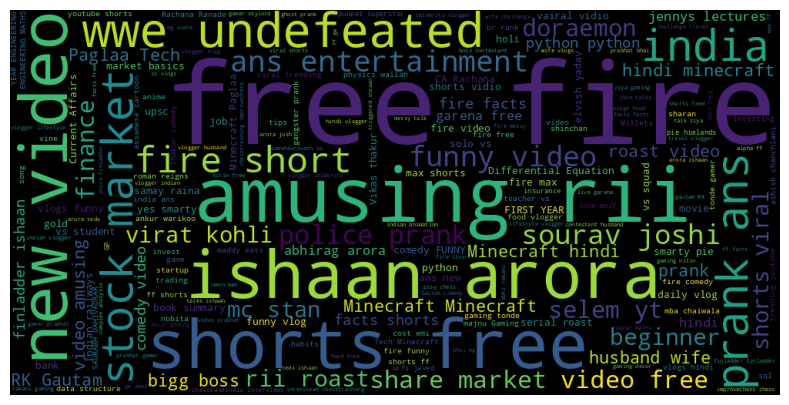

In [46]:
tags_wordcloud_df_27 = WordCloud(width = 1000, height = 500, stopwords = set(STOPWORDS)).generate(Tags_df_27)
plt.figure(figsize = (15,5))
plt.imshow(tags_wordcloud_df_27)
plt.axis("off")

In [47]:
Polarity=[] # list which will contain the polarity of the comments

for i in df_27['Comments']:
    Polarity.append(TextBlob(i).sentiment.polarity)

In [48]:
df_27["Polarity"] = Polarity
df_27.head()

<ipython-input-48-339cf883f825>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_27["Polarity"] = Polarity


,index,video_id,title,description,category_id,tags,duration,view_count,likes,no_of_comments,upload_time,channel_title,thumbnail,topic_categories,Comments,year,month,day,Polarity
2,5,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",0 days 00:13:28,91801,5100,220,2023-03-26 05:16:10,SeeKen,{'url': 'https://i.ytimg.com/vi/bTo4s27L1Uw/de...,['https://en.wikipedia.org/wiki/Society'],"[""So nice explaining, can't express in words"",...",2023,3,26,0.363439
7,11,fVToMH6onOs,5 LIFE Lessons Men Learn TOO LATE In Life (MUS...,Timestamps:\n00:00 - Robot Man And Future \n01...,27,"['masculine energy', 'how to be a high value m...",0 days 00:13:24,652716,33761,566,2023-01-01 05:27:07,SeeKen,{'url': 'https://i.ytimg.com/vi/fVToMH6onOs/de...,['https://en.wikipedia.org/wiki/Knowledge'],['Mistakes-:1- good relationship is more impor...,2023,1,1,0.338376
11,19,SmLUuNQK9js,What Next for Yes Bank? | CA Rachana Ranade | ...,"Description:- In March 2020, a consortium of i...",27,"['CA Rachana Ranade', 'Rachana Ranade', 'Finfl...",0 days 00:00:48,77773,2587,61,2023-03-11 12:30:21,CA Rachana Phadke Ranade,{'url': 'https://i.ytimg.com/vi/SmLUuNQK9js/de...,['https://en.wikipedia.org/wiki/Knowledge'],"[""there was a recent 10 - 12 % correction (bef...",2023,3,11,0.086839
14,22,CSf2YBaIl0s,Get the most out of every Coding Problem with ...,When it comes to getting better at problem sol...,27,"['coding', 'competitiveprogramming', 'dsa', 'p...",0 days 00:11:27,5013,389,36,2023-03-16 11:27:34,Priyansh Agarwal,{'url': 'https://i.ytimg.com/vi/CSf2YBaIl0s/de...,['https://en.wikipedia.org/wiki/Knowledge'],"[""Tip 1: Try and prove ur solution, do not rel...",2023,3,16,0.176688
17,26,g8gy21DRK34,COMPLEX INTEGRATION | S-4 | LINE INTEGRAL | CO...,** The integration of a function of a complex ...,27,"['COMPLEX INETRGATION', 'complex integration',...",0 days 00:24:04,779,33,3,2023-03-19 15:00:11,SAURABH DAHIVADKAR,{'url': 'https://i.ytimg.com/vi/g8gy21DRK34/de...,['https://en.wikipedia.org/wiki/Knowledge'],"['Sir, btech first year ki physics mein ek cha...",2023,3,19,0.034615


In [49]:
positive_comments_df_27 = df_27[df_27["Polarity"] >= 0]
positive_comments_df_27.head()

,index,video_id,title,description,category_id,tags,duration,view_count,likes,no_of_comments,upload_time,channel_title,thumbnail,topic_categories,Comments,year,month,day,Polarity
2,5,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",0 days 00:13:28,91801,5100,220,2023-03-26 05:16:10,SeeKen,{'url': 'https://i.ytimg.com/vi/bTo4s27L1Uw/de...,['https://en.wikipedia.org/wiki/Society'],"[""So nice explaining, can't express in words"",...",2023,3,26,0.363439
7,11,fVToMH6onOs,5 LIFE Lessons Men Learn TOO LATE In Life (MUS...,Timestamps:\n00:00 - Robot Man And Future \n01...,27,"['masculine energy', 'how to be a high value m...",0 days 00:13:24,652716,33761,566,2023-01-01 05:27:07,SeeKen,{'url': 'https://i.ytimg.com/vi/fVToMH6onOs/de...,['https://en.wikipedia.org/wiki/Knowledge'],['Mistakes-:1- good relationship is more impor...,2023,1,1,0.338376
11,19,SmLUuNQK9js,What Next for Yes Bank? | CA Rachana Ranade | ...,"Description:- In March 2020, a consortium of i...",27,"['CA Rachana Ranade', 'Rachana Ranade', 'Finfl...",0 days 00:00:48,77773,2587,61,2023-03-11 12:30:21,CA Rachana Phadke Ranade,{'url': 'https://i.ytimg.com/vi/SmLUuNQK9js/de...,['https://en.wikipedia.org/wiki/Knowledge'],"[""there was a recent 10 - 12 % correction (bef...",2023,3,11,0.086839
14,22,CSf2YBaIl0s,Get the most out of every Coding Problem with ...,When it comes to getting better at problem sol...,27,"['coding', 'competitiveprogramming', 'dsa', 'p...",0 days 00:11:27,5013,389,36,2023-03-16 11:27:34,Priyansh Agarwal,{'url': 'https://i.ytimg.com/vi/CSf2YBaIl0s/de...,['https://en.wikipedia.org/wiki/Knowledge'],"[""Tip 1: Try and prove ur solution, do not rel...",2023,3,16,0.176688
17,26,g8gy21DRK34,COMPLEX INTEGRATION | S-4 | LINE INTEGRAL | CO...,** The integration of a function of a complex ...,27,"['COMPLEX INETRGATION', 'complex integration',...",0 days 00:24:04,779,33,3,2023-03-19 15:00:11,SAURABH DAHIVADKAR,{'url': 'https://i.ytimg.com/vi/g8gy21DRK34/de...,['https://en.wikipedia.org/wiki/Knowledge'],"['Sir, btech first year ki physics mein ek cha...",2023,3,19,0.034615


In [50]:
total_positive_df_27= (" ".join(positive_comments_df_27["Comments"]))
len(total_positive_df_27)

748584

(-0.5, 999.5, 499.5, -0.5)

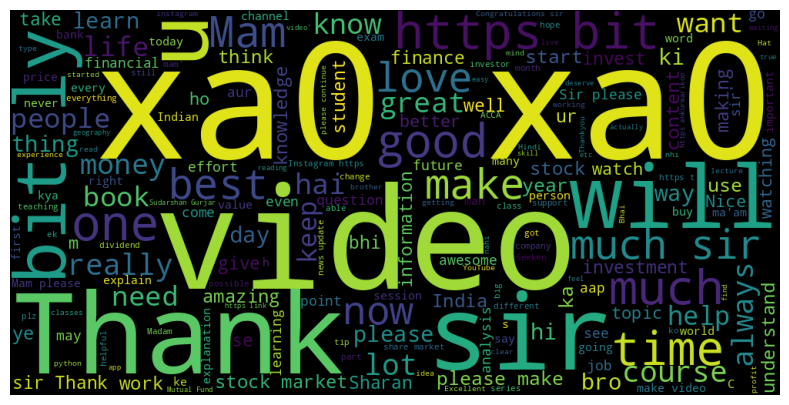

In [51]:
positive_wordcloud_df_27 = WordCloud(width = 1000, height = 500, stopwords = set(STOPWORDS)).generate(total_positive_df_27) #set will remove all the repetition
plt.figure(figsize = (15,5))
plt.imshow(positive_wordcloud_df_27)
plt.axis("off")

In [52]:
negative_comments_df_27 = df_27[df_27["Polarity"]<=-0.0001]
negative_comments_df_27.head()

,index,video_id,title,description,category_id,tags,duration,view_count,likes,no_of_comments,upload_time,channel_title,thumbnail,topic_categories,Comments,year,month,day,Polarity
93,144,LgaQUy5qlFI,WHY VALUE FOR PAPER MONEY,#money \n#currency \n#transaction \n#digitalcu...,27,"['Why we are using paper currency', 'History o...",0 days 00:01:00,503,60,2,2023-03-19 08:10:35,Gold Janardhan Investor,{'url': 'https://i.ytimg.com/vi/LgaQUy5qlFI/de...,['https://en.wikipedia.org/wiki/Society'],['Bro English subtitles haaku atleastAavaga no...,2023,3,19,-0.010000
105,162,jopIZ9-jvEQ,COMPLEX INTEGRATION | S-2 | LINE INTEGRAL | CO...,** The integration of a function of a complex ...,27,"['COMPLEX INETRGATION', 'complex integration',...",0 days 00:18:39,2234,72,16,2023-03-08 15:30:09,SAURABH DAHIVADKAR,{'url': 'https://i.ytimg.com/vi/jopIZ9-jvEQ/de...,['https://en.wikipedia.org/wiki/Knowledge'],"['Is there a daily live sessions ?', 'Sir N...",2023,3,8,-0.006543
224,355,VVXAeYRlXtM,COMPLEX INTEGRATION | S-3 | LINE INTEGRAL | CO...,** The integration of a function of a complex ...,27,"['COMPLEX INETRGATION', 'complex integration',...",0 days 00:11:00,494,22,2,2023-03-17 13:30:08,SAURABH DAHIVADKAR,{'url': 'https://i.ytimg.com/vi/VVXAeYRlXtM/de...,['https://en.wikipedia.org/wiki/Knowledge'],['Sir 11 din me sirf 3 session hue hai .Aisa r...,2023,3,17,-0.012626
270,427,9Qib34lmgxE,Scientific Assistant jobs in IMD (2022) | Elig...,Scientific Assistant Notification Link: https:...,27,"['Jobs', 'Government jobs', 'ssc jobs', 'trend...",0 days 00:09:01,20800,465,171,2022-10-07 14:10:35,Gate Smashers,{'url': 'https://i.ytimg.com/vi/9Qib34lmgxE/de...,['https://en.wikipedia.org/wiki/Knowledge'],['I have done BSC Hons maths and studied physi...,2022,10,7,-0.027222
426,678,O1Tpvs-z_Do,Sorting 1D Numpy Array with Execution | Python...,0:00 - Introduction\n0:29 - Sorting 1D array\n...,27,"['sort 1d array', 'sorting of array', 'numpy a...",0 days 00:06:22,1684,42,3,2023-03-25 11:30:08,Gate Smashers,{'url': 'https://i.ytimg.com/vi/O1Tpvs-z_Do/de...,['https://en.wikipedia.org/wiki/Knowledge'],['Sir hpsc pgt ka exam bhi bhaut jruri h hmare...,2023,3,25,-0.051515


In [53]:
total_negative_df_27= (" ".join(negative_comments_df_27["Comments"]))
len(total_negative_df_27)

18046

(-0.5, 999.5, 499.5, -0.5)

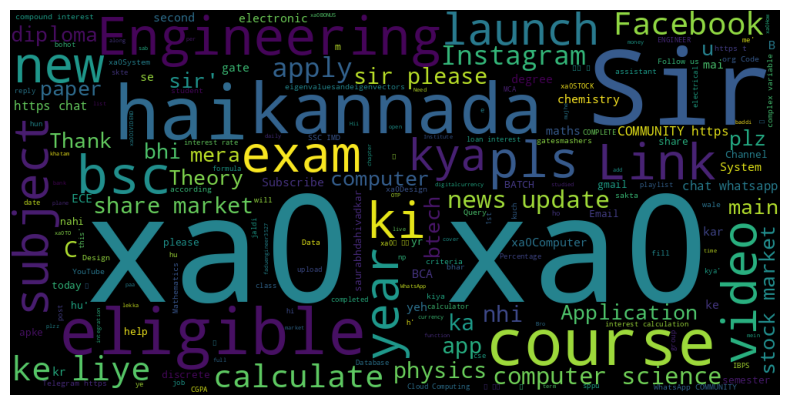

In [54]:
negative_wordcloud_df_27 = WordCloud(width = 1000, height = 500, stopwords = set(STOPWORDS)).generate(total_negative_df_27) #set will remove all the repetition
plt.figure(figsize = (15,5))
plt.imshow(negative_wordcloud_df_27)
plt.axis("off")

In [55]:
channel_data['created_time'] = pd.to_datetime(channel_data['created_time'])


channel_data['year'] = channel_data['created_time'].dt.year
channel_data['month'] = channel_data['created_time'].dt.month
channel_data['day'] = channel_data['created_time'].dt.day

print(channel_data)

    Unnamed: 0.1  Unnamed: 0                channel_id  \
0              0           0  UCn_l37ETRGxVsVqPAZM-y7w   
1              1           1  UCg3811K2k6ZW0T9wrUyq7UQ   
2              2           2  UCO1-i4iqe_Kg0B-nwt5W0Gg   
3              3           3  UC6AhmVhClcDx2RPsFFw_fAA   
4              4           4  UC5v-gTzCpaY257sxx-8P_-Q   
5              5           5  UCHOrSFKttbAKpcyjnBfVqkw   
6              6           6  UCQRSY8W2A1DST5qtm8NNhMA   
7              7           7  UC2IuURiiASwNigfQJtXiRdQ   
8              8           8  UC8k6b-QBPW79SOvO4C9hBOQ   
9              9           9  UCo-61NMiPlPP6er3I9AcDvw   
10            10          10  UCmVATZGddUN9Xj4NLoSzYcw   
11            11          11  UCNzn3WhDLAfulMSzFzqhqTw   
12            12          12  UCLHAyQ3M3Y-GWF3Pov1mFfw   
13            13          13  UCY5pmgVzfxBXHBjnRnP-alQ   
14            14          14  UC1_-cyLlwnmTAesbMgruDpQ   
15            15          15  UC9cpGw2hVv-6G-76HO22jQg   
16            

In [56]:
conditions = [
    (df_27['upload_time'].dt.hour >= 6) & (df_27['upload_time'].dt.hour < 12),
    (df_27['upload_time'].dt.hour >= 12) & (df_27['upload_time'].dt.hour < 18),
    (df_27['upload_time'].dt.hour >= 18) | (df_27['upload_time'].dt.hour < 6)
]
values = ['morning', 'evening', 'night']
df_27['time_of_day'] = pd.Series(np.select(conditions, values))


print(df_27)

     index     video_id                                              title  \
2        5  bTo4s27L1Uw  #1 How @BBKiVines become 1 of India’s RICHEST ...   
7       11  fVToMH6onOs  5 LIFE Lessons Men Learn TOO LATE In Life (MUS...   
11      19  SmLUuNQK9js  What Next for Yes Bank? | CA Rachana Ranade | ...   
14      22  CSf2YBaIl0s  Get the most out of every Coding Problem with ...   
17      26  g8gy21DRK34  COMPLEX INTEGRATION | S-4 | LINE INTEGRAL | CO...   
..     ...          ...                                                ...   
453    721  _5_LCGRRaoM  FINANCE Job Interviews ke liye FREE Resource! ...   
465    740  ERcubYkMifY            6 Highest Paying Finance Jobs in India!   
466    742  r6C1nf_iz3o      "Tell me about Yourself" ka SABSE SAHI Answer   
467    743  515fPTbB-2o  Is 2023 the BEST YEAR to START UP? | Antler In...   
468    745  rJd57wSoxs8  Top 4 Reasons To Learn Personal Finance | Wome...   

                                           description  categor

<ipython-input-56-896d37fd2ca8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_27['time_of_day'] = pd.Series(np.select(conditions, values))


In [57]:
import pytz

now = datetime.now(pytz.utc)
channel_data['Channel Age'] = (now - channel_data['created_time']).dt.days

In [58]:
channel_data['Views_per_Sub'] = channel_data['view_count'] / channel_data['subscriber_count']

In [59]:
channel_data

,Unnamed: 0.1,Unnamed: 0,channel_id,channel_title,description,view_count,subscriber_count,video_count,created_time,uploads,other_links,Avg. Views per Video,emojis,clean_col,year,month,day,Channel Age,Views_per_Sub
0,0,0,UCn_l37ETRGxVsVqPAZM-y7w,Onkiify,Ahoy! Gamers What is Up it's your Boi Onkiify....,1443714,4820,193,2017-05-18 17:27:05+00:00,UUn_l37ETRGxVsVqPAZM-y7w,['https://www.youtube.com/redirect?event=chann...,7.480383e+03,[],Ahoy! Gamers What is Up it's your Boi Onkiify....,2017,5,18,2144,299.525726
1,1,1,UCg3811K2k6ZW0T9wrUyq7UQ,Boyzz World Gaming,Sup Guys\n I'm just a Weirdo W...,761326,1690,196,2020-09-07 06:42:54.287560+00:00,UUg3811K2k6ZW0T9wrUyq7UQ,['https://www.youtube.com/redirect?event=chann...,3.884316e+03,[❤️],Sup Guys\n I'm just a Weirdo W...,2020,9,7,936,450.488757
2,2,2,UCO1-i4iqe_Kg0B-nwt5W0Gg,Majnu Gaming,"Hello Gamer's 😍\n\nHello Family, \nMera Name H...",290799,4690,468,2021-05-28 08:27:39.183399+00:00,UUO1-i4iqe_Kg0B-nwt5W0Gg,['https://www.youtube.com/redirect?event=chann...,6.213654e+02,[😍],"Hello Gamer's \n\nHello Family, \nMera Name Ha...",2021,5,28,673,62.004051
3,3,3,UC6AhmVhClcDx2RPsFFw_fAA,SELEM YT,\nAGAR AAP LOG FREE FIRE LOVER❤️ HO TO MERA CH...,6427859,133000,339,2021-03-03 00:59:54.797482+00:00,UU6AhmVhClcDx2RPsFFw_fAA,[],1.896124e+04,"[❤️, 😊☺️, 😊☺️, 😔😔, ☑️, ☑️, ☑️, ☑️, ☑️, ☑️, ☑️,...",\nAGAR AAP LOG FREE FIRE LOVER HO TO MERA CHAN...,2021,3,3,760,48.329767
4,4,4,UC5v-gTzCpaY257sxx-8P_-Q,Paglaa Tech,1000 subscribers - 31/12/2021\n10000 subscribe...,17097445,147000,184,2016-05-16 16:06:36+00:00,UU5v-gTzCpaY257sxx-8P_-Q,[],9.292090e+04,[],1000 subscribers - 31/12/2021\n10000 subscribe...,2016,5,16,2511,116.309150
5,5,5,UCHOrSFKttbAKpcyjnBfVqkw,Prabhat Gamer,Hi guys I am Prabhat from Uttarakhand❤️\n🎬This...,154045275,2150000,249,2022-05-22 13:37:27.300710+00:00,UUHOrSFKttbAKpcyjnBfVqkw,[],6.186557e+05,"[❤️, 🎬, 💗, 🔥, 😘, 🔥, 👉, 💗, 👉, 👍, 👥, 💗, 🎈, 🎉, 👉,...",Hi guys I am Prabhat from Uttarakhand\nThis is...,2022,5,22,314,71.648965
6,6,6,UCQRSY8W2A1DST5qtm8NNhMA,SUBHAM HORE,So Hey Guys...!\nSUBHAM HORE Hare And Welcome ...,53777584,1110000,1072,2019-09-22 03:47:52+00:00,UUQRSY8W2A1DST5qtm8NNhMA,[],5.016566e+04,"[😍, ➞]",So Hey Guys...!\nSUBHAM HORE Hare And Welcome ...,2019,9,22,1288,48.448274
7,7,7,UC2IuURiiASwNigfQJtXiRdQ,SILENT GIRL GAMING,🔔🔔 bell all pe set karlo 🔔🔔plz\n❤️My name =Ani...,260787957,2590000,1407,2021-03-12 11:47:09.443209+00:00,UU2IuURiiASwNigfQJtXiRdQ,['https://www.youtube.com/redirect?event=chann...,1.853504e+05,"[🔔🔔, 🔔🔔, ❤️, 👉, 😘, ✌️, 🙏🏻, ✨, 💫, ❤️, ❤️, 👇👇👇👇, 🔥]",bell all pe set karlo plz\nMy name =Anisa\n\n...,2021,3,12,750,100.690331
8,8,8,UC8k6b-QBPW79SOvO4C9hBOQ,Ziyan Ki Gang,"Actors Funny Motivational Video Creator, Short...",1640577,10300,384,2022-06-08 17:46:44.155104+00:00,UU8k6b-QBPW79SOvO4C9hBOQ,[],4.272336e+03,"[❤️, 👍☺️, ❤️]","Actors Funny Motivational Video Creator, Short...",2022,6,8,297,159.279320
9,9,9,UCo-61NMiPlPP6er3I9AcDvw,Comedy Box R k Gautam,हँसते रहो हँसाते रहो बस हमारा यही एक प्रयास है...,2852009,10100,297,2021-03-30 09:16:03.775671+00:00,UUo-61NMiPlPP6er3I9AcDvw,[],9.602724e+03,[],हँसते रहो हँसाते रहो बस हमारा यही एक प्रयास है...,2021,3,30,732,282.377129


In [60]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 KB 13.1 MB/s eta 0:00:

In [61]:
vid_data['measure'] = vid_data['view_count'] 


#pycaret_data = vid_data[['likes', 'no_of_comments','duration','Engagement_Ratio', 'measure']]

# setup PyCaret
#from pycaret.regression import *
#exp_reg = setup(pycaret_data, target='measure')

# compare models
#best_model = compare_models()


In [ ]:
channel_data.columns

In [96]:
merged_data = pd.merge(vid_data, channel_data, on='channel_title', how='left')
merged_data

,index,video_id,title,description_x,category_id,tags,duration,view_count_x,likes,no_of_comments,...,uploads,other_links,Avg. Views per Video,emojis,clean_col,year_y,month_y,day_y,Channel Age,Views_per_Sub
0,0,-gJ1a4qzO58,Adopted by the SMALLEST FAMILY in Minecraft! (...,Adopted by the SMALLEST FAMILY in Minecraft! (...,20,"['minecraft', 'yes smarty pie himlands', 'Adop...",0 days 00:18:59,108078,3539,840,...,UU5v-gTzCpaY257sxx-8P_-Q,[],9.292090e+04,[],1000 subscribers - 31/12/2021\n10000 subscribe...,2016,5,16,2511,116.309150
1,2,XbIegQ5v334,I started playing chess when I was three years...,Aswath S (2214) is one of the brightest upcomi...,17,"['chessbaseindia', 'interviews', 'chesstrainin...",0 days 00:03:28,2082,74,5,...,UUIsEhwBMPkRHsEgqYAPQHsA,['https://www.youtube.com/redirect?event=chann...,1.035971e+05,[],"ChessBase India is the ""Most Popular"" chess pl...",2015,7,23,2809,777.155210
2,5,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",0 days 00:13:28,91801,5100,220,...,UUfhbydY40P2Lli9HuBz8cdA,['https://www.youtube.com/redirect?event=chann...,6.664944e+05,[],IMPROVING THE QUALITY OF OUR LIFE BY GAINING K...,2015,12,29,2650,75.490688
3,6,iEtjePI_sqc,Mere paas SABOOT nahi hai!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",0 days 00:12:50,1059186,46367,1846,...,UUhZ0JmGgyOWSU-1iXxPhsVA,['http://www.youtube.com/channel/UChZ0JmGgyOWS...,1.259600e+06,[],This is the official channel of Sambhavna Seth...,2014,7,26,3171,570.824316
4,8,gSYT7WSfekk,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,20,"['minecraft', 'yessmartypie himlands', 'The BI...",0 days 00:16:07,155964,6147,1163,...,UU5v-gTzCpaY257sxx-8P_-Q,[],9.292090e+04,[],1000 subscribers - 31/12/2021\n10000 subscribe...,2016,5,16,2511,116.309150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,742,r6C1nf_iz3o,"""Tell me about Yourself"" ka SABSE SAHI Answer","Hello Everyone, My Name is Ishaan Arora.\nI'm ...",27,"['finladder ishaan arora', 'tedx ishaan arora'...",0 days 00:00:59,2351,185,0,...,UUkOtNAT3-B2rAPEleWaytrA,['https://www.youtube.com/redirect?event=chann...,9.177290e+03,[],College mein ho? To sahi jagah aaye ho! :)\n\n...,2022,5,27,309,46.349949
467,743,515fPTbB-2o,Is 2023 the BEST YEAR to START UP? | Antler In...,Get my new book ‘GET EPIC SHIT DONE’ here: htt...,27,"['warikoo', 'ankur warikoo', 'Ankur Warikoo mo...",0 days 00:32:10,38969,1245,182,...,UURzYN32xtBf3Yxsx5BvJWJw,[],2.492526e+05,[],"warikoo is a serial entrepreneur, a bestsellin...",2017,8,1,2069,76.645187
468,745,rJd57wSoxs8,Top 4 Reasons To Learn Personal Finance | Wome...,✔️ Invest in Knowledge: https://social.rachana...,27,"['CA Rachana Ranade', 'stock market basics', '...",0 days 00:09:00,34971,1451,80,...,UUe3qdG0A_gr-sEdat5y2twQ,['https://www.youtube.com/redirect?event=chann...,2.288951e+05,[],To Learn Stock Market in simplified language c...,2009,3,10,5135,53.181368
469,747,sVte67QEAvU,Mummy ka Vlog TRENDING pe le aao!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",0 days 00:13:58,584614,40702,1493,...,UUhZ0JmGgyOWSU-1iXxPhsVA,['http://www.youtube.com/channel/UChZ0JmGgyOWS...,1.259600e+06,[],This is the official channel of Sambhavna Seth...,2014,7,26,3171,570.824316


In [ ]:
merged_data.columns

In [97]:
merged_data.isna().sum()

index                    0
video_id                 0
title                    0
description_x           18
category_id              0
tags                     0
duration                 0
view_count_x             0
likes                    0
no_of_comments           0
upload_time              0
channel_title            0
thumbnail                0
topic_categories         0
Comments                 0
year_x                   0
month_x                  0
day_x                    0
Polarity                 0
measure                  0
Engagement_Ratio         0
Unnamed: 0.1             0
Unnamed: 0               0
channel_id               0
description_y            0
view_count_y             0
subscriber_count         0
video_count              0
created_time             0
uploads                  0
other_links              0
Avg. Views per Video     0
emojis                   0
clean_col                0
year_y                   0
month_y                  0
day_y                    0
C

In [ ]:
merged_data.head()

In [ ]:
merged_data.columns

In [ ]:
#from pycaret.classification import *
#clf = setup(data = merged_data, target = 'subscriber_count', feature_selection=True)
#best_model = compare_models()

In [98]:
cor=merged_data.corr()
cor[cor>=0.4].view_count_x

index                        NaN
category_id                  NaN
view_count_x            1.000000
likes                   0.983709
no_of_comments          0.922035
year_x                       NaN
month_x                      NaN
day_x                        NaN
Polarity                     NaN
measure                 1.000000
Engagement_Ratio             NaN
Unnamed: 0.1                 NaN
Unnamed: 0                   NaN
view_count_y                 NaN
subscriber_count             NaN
video_count                  NaN
Avg. Views per Video    0.779982
year_y                       NaN
month_y                      NaN
day_y                        NaN
Channel Age                  NaN
Views_per_Sub                NaN
Name: view_count_x, dtype: float64

In [ ]:
merged_data.duration

In [99]:
conditions = [
    (merged_data['upload_time'].dt.hour >= 6) & (merged_data['upload_time'].dt.hour < 12),
    (merged_data['upload_time'].dt.hour >= 12) & (merged_data['upload_time'].dt.hour < 18),
    (merged_data['upload_time'].dt.hour >= 18) | (merged_data['upload_time'].dt.hour < 6)
]
values = ['morning', 'evening', 'night']
merged_data['time_of_day'] = pd.Series(np.select(conditions, values))

In [100]:
merged_data['duration'] = merged_data['duration'].astype('timedelta64[s]').astype(float)


merged_data['hours'], remainder = divmod(merged_data['duration'], 3600)
merged_data['minutes'], merged_data['seconds'] = divmod(remainder, 60)


In [ ]:
merged_data.columns.values

In [101]:
merged_data.pop('index')
merged_data.pop('Unnamed: 0.1')
merged_data.pop('Unnamed: 0')
merged_data=merged_data

In [ ]:
#for i in merged_data.columns:
#  print(merged_data[i])

In [102]:
merged_data['day_of_week'] = merged_data['upload_time'].dt.dayofweek

# check if the day of the week is a weekday (Monday to Friday)
merged_data['is_weekday'] = (merged_data['day_of_week'] < 5)

merged_data.is_weekday.head()

0     True
1     True
2    False
3    False
4    False
Name: is_weekday, dtype: bool

In [ ]:
merged_data.day_of_week.head()

In [103]:
merged_data['created_time'] = pd.to_datetime(merged_data['created_time'])
merged_data['upload_time'] = pd.to_datetime(merged_data['upload_time'])

# convert datetime column to date column
merged_data['created_time'] = merged_data['created_time'].dt.date
merged_data['upload_time'] = merged_data['upload_time'].dt.date

In [104]:
merged_data.measure = merged_data.view_count_x / merged_data.view_count_y * merged_data.subscriber_count

In [105]:
merged_data.to_csv('Merged Data.csv',index=False)

In [106]:
merged_data.to_excel('Merged Data.xlsx',index=False)

In [107]:
merged_data.corr()

,category_id,duration,view_count_x,likes,no_of_comments,year_x,month_x,day_x,Polarity,measure,...,year_y,month_y,day_y,Channel Age,Views_per_Sub,hours,minutes,seconds,day_of_week,is_weekday
category_id,1.000000,-0.020617,-0.418015,-0.427701,-0.421161,0.553832,-0.302527,-0.033640,-0.033206,-0.447048,...,-0.209862,0.202097,0.179767,0.194969,-0.051542,-0.071287,0.115350,0.050835,0.012790,-0.020297
duration,-0.020617,1.000000,-0.045697,-0.054913,-0.036421,-0.005499,0.093729,-0.060552,0.062090,-0.033022,...,-0.147918,-0.059455,-0.186854,0.155989,-0.019136,0.950649,0.622924,0.036713,-0.011185,0.002135
view_count_x,-0.418015,-0.045697,1.000000,0.983709,0.922035,-0.423520,0.094628,0.010939,0.078536,0.979125,...,-0.080864,-0.245849,-0.001309,0.101577,-0.082940,-0.045005,-0.022604,-0.059310,-0.041513,0.028607
likes,-0.427701,-0.054913,0.983709,1.000000,0.943780,-0.394700,0.085620,0.041763,0.043592,0.968518,...,-0.044512,-0.259789,0.008027,0.065819,-0.090517,-0.047142,-0.045685,-0.038988,-0.042213,0.031840
no_of_comments,-0.421161,-0.036421,0.922035,0.943780,1.000000,-0.369838,0.105109,0.036650,0.073982,0.924776,...,-0.049135,-0.243112,-0.028747,0.069438,-0.096683,-0.039301,-0.009129,-0.055019,-0.037935,0.029645
year_x,0.553832,-0.005499,-0.423520,-0.394700,-0.369838,1.000000,-0.644359,0.111058,-0.074139,-0.455178,...,-0.016636,0.114124,0.067347,0.007287,0.173316,-0.051066,0.109764,0.060330,-0.036910,0.037096
month_x,-0.302527,0.093729,0.094628,0.085620,0.105109,-0.644359,1.000000,-0.077813,0.011155,0.113409,...,0.033011,0.124388,-0.096774,-0.042788,-0.071392,0.140756,-0.069097,-0.066601,0.009238,-0.002411
day_x,-0.033640,-0.060552,0.010939,0.041763,0.036650,0.111058,-0.077813,1.000000,-0.026862,0.029487,...,0.086730,-0.033239,-0.037549,-0.084838,0.223495,-0.057308,-0.037962,-0.014169,-0.040490,0.071694
Polarity,-0.033206,0.062090,0.078536,0.043592,0.073982,-0.074139,0.011155,-0.026862,1.000000,0.065672,...,-0.208863,0.124458,-0.136498,0.202522,0.037715,-0.004061,0.199033,-0.050733,0.065665,-0.042507
measure,-0.447048,-0.033022,0.979125,0.968518,0.924776,-0.455178,0.113409,0.029487,0.065672,1.000000,...,-0.039223,-0.251965,-0.018983,0.060019,-0.140659,-0.029426,-0.023080,-0.073655,-0.034251,0.020184


In [108]:
merged_data.time_of_day.unique()

array(['morning', 'night', 'evening'], dtype=object)

<BarContainer object of 3 artists>

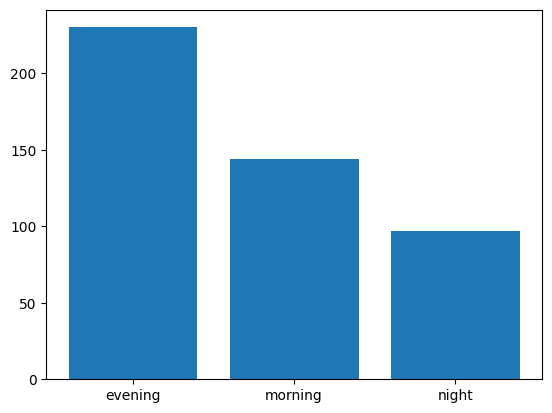

In [109]:
day_counts = merged_data['time_of_day'].value_counts()

# create a bar plot
plt.bar(day_counts.index,day_counts.values)

In [110]:
md=pd.DataFrame({
    'views':merged_data['view_count_x'],
    'timeofday':merged_data['time_of_day']
}); md

,views,timeofday
0,108078,morning
1,2082,morning
2,91801,night
3,1059186,morning
4,155964,morning
...,...,...
466,2351,evening
467,38969,evening
468,34971,morning
469,584614,morning


In [111]:
pd.DataFrame(merged_data.columns)

,0
0,video_id
1,title
2,description_x
3,category_id
4,tags
5,duration
6,view_count_x
7,likes
8,no_of_comments
9,upload_time


In [112]:
schedule_data = pd.pivot_table(merged_data, values='Avg. Views per Video', index='category_id', columns='upload_time', aggfunc='mean')


category_list = list(schedule_data.index)


schedule = {}
for category in category_list:
    max_views = 0
    ideal_time = ''
    for col in schedule_data.columns:
        if schedule_data.loc[category, col] > max_views:
            max_views = schedule_data.loc[category, col]
            ideal_time = col
    schedule[category] = ideal_time


print("Ideal upload schedule by category:")
for category, time in schedule.items():
    print(f"{category}: {time}")

Ideal upload schedule by category:
1: 2018-08-05
10: 2023-01-26
17: 2022-07-29
19: 2022-12-21
20: 2023-01-16
22: 2023-03-04
23: 2022-08-11
24: 2022-12-16
25: 2023-03-06
27: 2023-02-28


In [113]:
pd.DataFrame(merged_data.columns)

,0
0,video_id
1,title
2,description_x
3,category_id
4,tags
5,duration
6,view_count_x
7,likes
8,no_of_comments
9,upload_time


In [114]:
m27=merged_data[merged_data.category_id==27]
m27.head()

,video_id,title,description_x,category_id,tags,duration,view_count_x,likes,no_of_comments,upload_time,...,month_y,day_y,Channel Age,Views_per_Sub,time_of_day,hours,minutes,seconds,day_of_week,is_weekday
2,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",808.0,91801,5100,220,2023-03-26,...,12,29,2650,75.490688,night,0.0,13.0,28.0,6,False
7,fVToMH6onOs,5 LIFE Lessons Men Learn TOO LATE In Life (MUS...,Timestamps:\n00:00 - Robot Man And Future \n01...,27,"['masculine energy', 'how to be a high value m...",804.0,652716,33761,566,2023-01-01,...,12,29,2650,75.490688,night,0.0,13.0,24.0,6,False
11,SmLUuNQK9js,What Next for Yes Bank? | CA Rachana Ranade | ...,"Description:- In March 2020, a consortium of i...",27,"['CA Rachana Ranade', 'Rachana Ranade', 'Finfl...",48.0,77773,2587,61,2023-03-11,...,3,10,5135,53.181368,evening,0.0,0.0,48.0,5,False
14,CSf2YBaIl0s,Get the most out of every Coding Problem with ...,When it comes to getting better at problem sol...,27,"['coding', 'competitiveprogramming', 'dsa', 'p...",687.0,5013,389,36,2023-03-16,...,2,20,1136,41.514957,morning,0.0,11.0,27.0,3,True
17,g8gy21DRK34,COMPLEX INTEGRATION | S-4 | LINE INTEGRAL | CO...,** The integration of a function of a complex ...,27,"['COMPLEX INETRGATION', 'complex integration',...",1444.0,779,33,3,2023-03-19,...,11,23,3416,118.610929,evening,0.0,24.0,4.0,6,False


In [115]:
m27.corr()

,category_id,duration,view_count_x,likes,no_of_comments,year_x,month_x,day_x,Polarity,measure,...,year_y,month_y,day_y,Channel Age,Views_per_Sub,hours,minutes,seconds,day_of_week,is_weekday
category_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,1.000000,-0.140226,-0.154320,0.110136,0.064123,-0.089344,0.002021,0.050014,-0.034195,...,-0.362189,0.093010,-0.223346,0.354165,-0.058911,0.520832,0.804912,0.024218,0.199402,-0.105522
view_count_x,NaN,-0.140226,1.000000,0.987916,0.340157,0.054875,-0.085894,-0.178061,0.006088,0.830575,...,-0.153260,-0.038747,0.173430,0.154292,0.366763,-0.043754,-0.135897,0.092122,-0.016041,-0.000289
likes,NaN,-0.154320,0.987916,1.000000,0.349782,0.091313,-0.120947,-0.151344,-0.007855,0.813825,...,-0.155508,-0.039474,0.174490,0.156588,0.376602,-0.041801,-0.153230,0.076244,-0.027066,0.009210
no_of_comments,NaN,0.110136,0.340157,0.349782,1.000000,0.128505,-0.153717,0.017191,0.112222,0.539937,...,-0.290818,-0.023198,-0.161281,0.291929,0.004291,0.001279,0.126699,0.029916,0.173825,-0.138264
year_x,NaN,0.064123,0.054875,0.091313,0.128505,1.000000,-0.945595,0.175904,-0.076544,0.112230,...,-0.111277,-0.175615,-0.176601,0.125144,-0.446237,0.038315,0.046389,0.064670,0.044574,-0.062765
month_x,NaN,-0.089344,-0.085894,-0.120947,-0.153717,-0.945595,1.000000,-0.222089,0.027745,-0.181566,...,0.082674,0.125557,0.091150,-0.092390,0.426345,-0.053140,-0.065655,-0.060600,-0.105022,0.112103
day_x,NaN,0.002021,-0.178061,-0.151344,0.017191,0.175904,-0.222089,1.000000,0.075405,-0.149039,...,0.115570,-0.012104,-0.036151,-0.113775,-0.055383,0.015084,-0.008482,0.013645,-0.064740,0.081244
Polarity,NaN,0.050014,0.006088,-0.007855,0.112222,-0.076544,0.027745,0.075405,1.000000,0.086676,...,0.149286,-0.089191,0.031054,-0.141722,-0.175720,-0.051253,0.090813,0.104278,0.074294,-0.134091
measure,NaN,-0.034195,0.830575,0.813825,0.539937,0.112230,-0.181566,-0.149039,0.086676,1.000000,...,-0.250831,0.049132,0.015746,0.245587,0.122687,-0.054670,-0.005652,0.125869,0.171038,-0.196767


In [116]:
merged_data.columns

Index(['video_id', 'title', 'description_x', 'category_id', 'tags', 'duration',
       'view_count_x', 'likes', 'no_of_comments', 'upload_time',
       'channel_title', 'thumbnail', 'topic_categories', 'Comments', 'year_x',
       'month_x', 'day_x', 'Polarity', 'measure', 'Engagement_Ratio',
       'channel_id', 'description_y', 'view_count_y', 'subscriber_count',
       'video_count', 'created_time', 'uploads', 'other_links',
       'Avg. Views per Video', 'emojis', 'clean_col', 'year_y', 'month_y',
       'day_y', 'Channel Age', 'Views_per_Sub', 'time_of_day', 'hours',
       'minutes', 'seconds', 'day_of_week', 'is_weekday'],
      dtype='object')

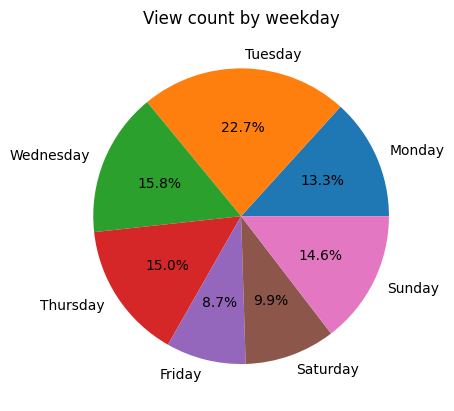

In [117]:
grouped = merged_data.groupby(merged_data['day_of_week'])['view_count_x'].sum()


labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


plt.pie(grouped, labels=labels, autopct='%1.1f%%')
plt.title('View count by weekday')
plt.show()

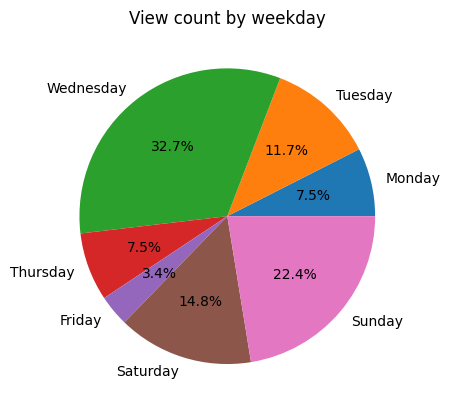

In [118]:
grouped_m27 = m27.groupby(m27['day_of_week'])['view_count_x'].sum()


labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


plt.pie(grouped_m27, labels=labels, autopct='%1.1f%%')
plt.title('View count by weekday')
plt.show()

Due to Saturday holidays, people may not want to watch educational content over the weekends. So Friday evenings may not be a suitable time for uplaoding a video.

In [119]:
schedule_data = pd.pivot_table(merged_data, values='Avg. Views per Video', index='category_id', columns='upload_time', aggfunc='mean')


category_list = list(schedule_data.index)


schedule = {}
for category in category_list:
    max_views = 0
    ideal_time = ''
    for col in schedule_data.columns:
        if schedule_data.loc[category, col] > max_views:
            max_views = schedule_data.loc[category, col]
            ideal_time = col
    schedule[category] = ideal_time


print("Ideal upload schedule by category:")
for category, time in schedule.items():
    print(f"{category}: {time}")

Ideal upload schedule by category:
1: 2018-08-05
10: 2023-01-26
17: 2022-07-29
19: 2022-12-21
20: 2023-01-16
22: 2023-03-04
23: 2022-08-11
24: 2022-12-16
25: 2023-03-06
27: 2023-02-28


In [120]:
tags_df = merged_data['tags'].str.split('|', expand=True)
tags_df.columns = [f'tag_{i}' for i in range(1, len(tags_df.columns)+1)]


merged_data = pd.concat([merged_data, tags_df], axis=1)


merged_data = merged_data.fillna(0)


for col in tags_df.columns:
    merged_data[col] = merged_data[col].apply(lambda x: 1 if x != 0 else 0)

In [121]:
merged_data['duration'] = pd.to_timedelta(merged_data['duration'])

# Extract the total seconds from Timedelta object and assign it back to 'duration' column
merged_data['duration'] = merged_data['duration'].dt.total_seconds()

merged_data.head()

,video_id,title,description_x,category_id,tags,duration,view_count_x,likes,no_of_comments,upload_time,...,minutes,seconds,day_of_week,is_weekday,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6
0,-gJ1a4qzO58,Adopted by the SMALLEST FAMILY in Minecraft! (...,Adopted by the SMALLEST FAMILY in Minecraft! (...,20,"['minecraft', 'yes smarty pie himlands', 'Adop...",1.139000e-06,108078,3539,840,2023-03-10,...,18.0,59.0,4,True,1,0,0,0,0,0
1,XbIegQ5v334,I started playing chess when I was three years...,Aswath S (2214) is one of the brightest upcomi...,17,"['chessbaseindia', 'interviews', 'chesstrainin...",2.080000e-07,2082,74,5,2023-03-29,...,3.0,28.0,2,True,1,0,0,0,0,0
2,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",8.080000e-07,91801,5100,220,2023-03-26,...,13.0,28.0,6,False,1,0,0,0,0,0
3,iEtjePI_sqc,Mere paas SABOOT nahi hai!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",7.700000e-07,1059186,46367,1846,2023-03-04,...,12.0,50.0,5,False,1,0,0,0,0,0
4,gSYT7WSfekk,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,20,"['minecraft', 'yessmartypie himlands', 'The BI...",9.670000e-07,155964,6147,1163,2023-03-12,...,16.0,7.0,6,False,1,0,0,0,0,0


In [122]:
min(merged_data.Engagement_Ratio)

0.0

In [124]:
max(merged_data.Engagement_Ratio)

0.6

In [123]:
merged_data.columns

Index(['video_id', 'title', 'description_x', 'category_id', 'tags', 'duration',
       'view_count_x', 'likes', 'no_of_comments', 'upload_time',
       'channel_title', 'thumbnail', 'topic_categories', 'Comments', 'year_x',
       'month_x', 'day_x', 'Polarity', 'measure', 'Engagement_Ratio',
       'channel_id', 'description_y', 'view_count_y', 'subscriber_count',
       'video_count', 'created_time', 'uploads', 'other_links',
       'Avg. Views per Video', 'emojis', 'clean_col', 'year_y', 'month_y',
       'day_y', 'Channel Age', 'Views_per_Sub', 'time_of_day', 'hours',
       'minutes', 'seconds', 'day_of_week', 'is_weekday', 'tag_1', 'tag_2',
       'tag_3', 'tag_4', 'tag_5', 'tag_6'],
      dtype='object')

In [ ]:
merged_data.columns

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Load the data into dataframes
#channel_data = pd.read_csv("channel_data.csv")
#video_data = pd.read_csv("video_data.csv")

# Merge the dataframes on the common column "Channel Title"
#merged_data = pd.merge(channel_data, video_data, on="Channel Title")

# Define the feature and target variables
features = ['subscriber_count', 'video_count', 'duration', 'no_of_comments', 'likes',
            'tag_1','tag_2','tag_3','tag_4','tag_5','tag_6','is_weekday']
target = 'Avg. Views per Video'

# Split the data into training and testing sets
train_data, test_data = train_test_split(merged_data, test_size=0.2, random_state=42)
X_test=np.array(train_data[features]).reshape(-1,len(features))
y_test=np.array(train_data[target]).reshape(-1,1)

# Train the model using Random Forest Regression
model = LinearRegression()
model.fit(X_test, y_test)

# Use the trained model to make predictions on the test set
predictions = model.predict(test_data[features])

# Sort the test set by predicted "Upload Time" and select the top 10 rows
#top_10_youtubers = test_data[['channel_title', 'upload_time']].copy()
#top_10_youtubers['Predicted Upload Time'] = predictions
#top_10_youtubers = top_10_youtubers.sort_values('Predicted Upload Time').head(10)
top_10_youtubers = test_data[['channel_title', 'Avg. Views per Video']].copy()
top_10_youtubers['Predicted Avg View Counts'] = predictions
top_10_youtubers = top_10_youtubers.sort_values('Predicted Avg View Counts',ascending=False)

# Display the top 10 upcoming YouTubers
print(top_10_youtubers)

       channel_title  Avg. Views per Video  Predicted Avg View Counts
173  R.G Bucket List          7.774391e+06               5.141728e+06
297  R.G Bucket List          7.774391e+06               2.949903e+06
429    Prabhat Gamer          6.186557e+05               1.692484e+06
415    pranjal kamra          8.816915e+05               1.621898e+06
154    Prabhat Gamer          6.186557e+05               1.514184e+06
..               ...                   ...                        ...
231      Vivek Desai          5.738961e+04              -2.944847e+05
440  ChessBase India          1.035971e+05              -3.646159e+05
124  ChessBase India          1.035971e+05              -3.825520e+05
412  ChessBase India          1.035971e+05              -3.831943e+05
352  ChessBase India          1.035971e+05              -3.864658e+05

[95 rows x 3 columns]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [126]:
top_10_youtubers.channel_title.unique()

array(['R.G Bucket List', 'Prabhat Gamer', 'pranjal kamra',
       'Sambhavna Seth Entertainment', 'Nazar Battu',
       'CA Rachana Phadke Ranade', 'Mumbiker Nikhil', 'warikoo', 'SeeKen',
       'Samay Raina', 'Finance With Sharan', 'Neon Man', 'NeuzBoy',
       'Amusing Rii', 'ANS Entertainment', 'Prafull MBA CHAI WALA',
       'MOinsideHIT', 'Gate Smashers', "Jenny's Lectures CS IT",
       'Anime Spirit', 'Sakshi Shrivas', 'Paglaa Tech', 'Intxstelar',
       'Rohan Joshi', 'SELEM YT', 'Sudarshan Gurjar',
       'Gold Janardhan Investor', 'AG !', 'Onkiify',
       'Comedian Vikas Thakur', 'Ishaan Arora', 'Boyzz World Gaming',
       'Comedy Box R k Gautam', 'SAURABH DAHIVADKAR', 'Majnu Gaming',
       'Vivek Desai', 'ChessBase India'], dtype=object)

In [127]:
avg=merged_data['subscriber_count'].mean()
avg

1300319.5329087048

In [128]:
upcoming_data=merged_data[merged_data['subscriber_count']<avg]
upcoming_data

,video_id,title,description_x,category_id,tags,duration,view_count_x,likes,no_of_comments,upload_time,...,minutes,seconds,day_of_week,is_weekday,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6
0,-gJ1a4qzO58,Adopted by the SMALLEST FAMILY in Minecraft! (...,Adopted by the SMALLEST FAMILY in Minecraft! (...,20,"['minecraft', 'yes smarty pie himlands', 'Adop...",1.139000e-06,108078,3539,840,2023-03-10,...,18.0,59.0,4,True,1,0,0,0,0,0
1,XbIegQ5v334,I started playing chess when I was three years...,Aswath S (2214) is one of the brightest upcomi...,17,"['chessbaseindia', 'interviews', 'chesstrainin...",2.080000e-07,2082,74,5,2023-03-29,...,3.0,28.0,2,True,1,0,0,0,0,0
4,gSYT7WSfekk,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,20,"['minecraft', 'yessmartypie himlands', 'The BI...",9.670000e-07,155964,6147,1163,2023-03-12,...,16.0,7.0,6,False,1,0,0,0,0,0
5,yXL-ZqGVzHo,TU HOTI TOH Part 2 ft. Raghvika Kohli & Tarun ...,Some journeys start but never end! This story ...,24,"['ncr days', 'love', 'love story', 'break up',...",1.120000e-06,5661,248,17,2023-01-27,...,18.0,40.0,4,True,1,0,0,0,0,0
6,6-EMQ--PEso,বহুবিবাহ in Bangla Serial 😂| Amusing Rii,Follow me on-\nFacebook: https://m.facebook.co...,23,"['Amusing Rii', 'amusing rii new video', 'amus...",4.900000e-07,803063,32560,1488,2023-01-27,...,8.0,10.0,4,True,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,Itr0siyX7ns,Jitega bhai jitega // election 2022 चुनावी कॉम...,A comedy spoof on election \nBy comedian vikas...,23,"['election comedy', 'neta jicomedy', 'chunaav ...",5.590000e-07,3529,309,23,2022-11-01,...,9.0,19.0,1,True,1,0,0,0,0,0
464,yWIKZBJ8P70,DATE GONE WRONG || AG! #shorts #youtubeshorts...,For Business Inquiries: GOPALGOYAL444@GMAIL.C...,23,"['ag', 'ag channel', 'ag new video', 'abhirag ...",6.000000e-08,281,12,0,2023-01-20,...,1.0,0.0,4,True,1,0,0,0,0,0
465,ERcubYkMifY,6 Highest Paying Finance Jobs in India!,"In this video, Ishaan Arora talks about the hi...",27,"['finladder ishaan arora', 'tedx ishaan arora'...",4.030000e-07,5226,291,61,2023-02-23,...,6.0,43.0,3,True,1,0,0,0,0,0
466,r6C1nf_iz3o,"""Tell me about Yourself"" ka SABSE SAHI Answer","Hello Everyone, My Name is Ishaan Arora.\nI'm ...",27,"['finladder ishaan arora', 'tedx ishaan arora'...",5.900000e-08,2351,185,0,2023-02-21,...,0.0,59.0,1,True,1,0,0,0,0,0


In [129]:
upyt=upcoming_data.channel_title.unique()
upyt

array(['Paglaa Tech', 'ChessBase India', 'Log Kya Kahenge', 'Amusing Rii',
       'Rohan Joshi', 'Priyansh Agarwal', 'Anime Spirit', 'AG !',
       'SAURABH DAHIVADKAR', 'Intxstelar', 'Boyzz World Gaming',
       'MOinsideHIT', 'Comedy Box R k Gautam', 'Majnu Gaming',
       'Sudarshan Gurjar', 'Ishaan Arora', "Jenny's Lectures CS IT",
       'DilSeBuraLagtaHai Bhai', 'Samay Raina', 'NeuzBoy',
       'Comedian Vikas Thakur', 'Sakshi Shrivas', 'SELEM YT',
       'Gold Janardhan Investor', 'Onkiify', 'Abhishek Prajapati',
       'Vivek Desai', 'Jentilal'], dtype=object)

In [132]:
below_avg_channels = top_10_youtubers[merged_data['subscriber_count'] < avg]

unique_channels = below_avg_channels['channel_title'].unique()[:10]

<ipython-input-132-745fc03f1b2f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  below_avg_channels = top_10_youtubers[merged_data['subscriber_count'] < avg]


In [134]:
unique_channels

array(['Samay Raina', 'NeuzBoy', 'Amusing Rii', 'MOinsideHIT',
       "Jenny's Lectures CS IT", 'Anime Spirit', 'Sakshi Shrivas',
       'Paglaa Tech', 'Intxstelar', 'Rohan Joshi'], dtype=object)

In [143]:
category_group = merged_data.groupby('category_id')

# Calculate the average view count, likes, comments, and subscriber count for each category
category_avg = category_group[['view_count_x', 'likes', 'no_of_comments', 'subscriber_count']].mean()

# Display the results
category_avg.to_csv('category_avg.csv',index=False)

<BarContainer object of 291 artists>

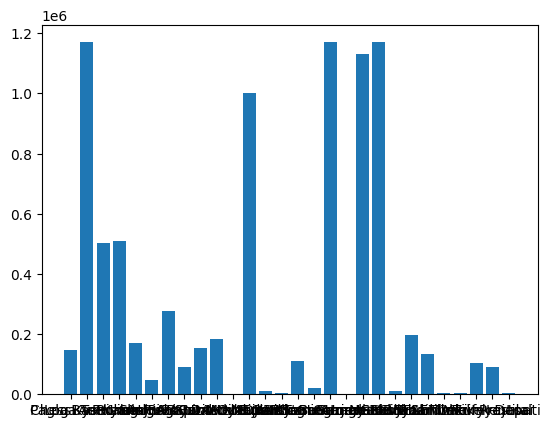

In [140]:
plt.bar(merged_data['channel_title'][merged_data['subscriber_count']<avg],
        merged_data['subscriber_count'][merged_data['subscriber_count']<avg])

In [ ]:
category_group = merged_data.groupby('Category_id')

# Calculate the average view count, likes, comments, and subscriber count for each category
category_avg = category_group[['view_count_x', 'likes', no_of_'comments', 'subscriber_ Count']].mean()

# Display the results
print(category_avg)